# Clustering


In [81]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from kneed import KneeLocator
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import silhouette_score, davies_bouldin_score



In [2]:
InterviewData=pd.read_csv("responses.csv")

In [3]:
pd.set_option('display.max_columns', 999)
InterviewData.head()


Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  \
0      1.0  5.0   5.0                1.0   1.0          1.0          1.0   
1      2.0  3.0   5.0                4.0   4.0          1.0          3.0   
2      5.0  3.0   5.0                3.0   4.0          1.0          4.0   
3      1.0  2.0   2.0                1.0   4.0          2.0          2.0   
4      3.0  5.0   3.0                1.0   2.0          5.0          3.0   

   Swing, Jazz  Rock n roll  Alternative  Latino  Techno, Trance  Opera  \
0          1.0          3.0          1.0     1.0             1.0    1.0   
1          1.0          4.0          4.0     2.0             1.0    1.0   
2          3.0          5.0          5.0     5.0             1.0    3.0   
3          1.0          2.0          5.0     1.0             2.0    1.0   
4          2.0          1.0          2.0     4.0             2.0    2.0   

   Movies  Horror  Thriller  Comedy  Romantic  Sci-fi  War  \
0     5.0     4.0       2.0     5.0       4.0     4.0  1.0   
1     5.0     2.0       2.0     4.0       3.0     4.0  1.0   
2     5.0     3.0       4.0     4.0       2.0     4.0  2.0   
3     5.0     4.0       4.0     3.0       3.0     4.0  3.0   
4     5.0     4.0       4.0     5.0       2.0     3.0  3.0   

   Fantasy/Fairy tales  Animated  Documentary  Western  Action  History  \
0                  5.0       5.0          3.0      1.0     2.0      1.0   
1                  3.0       5.0          4.0      1.0     4.0      1.0   
2                  5.0       5.0          2.0      2.0     1.0      1.0   
3                  1.0       2.0          5.0      1.0     2.0      4.0   
4                  4.0       4.0          3.0      1.0     4.0      3.0   

   Psychology  Politics  Mathematics  Physics  Internet   PC  \
0         5.0       1.0          3.0      3.0       5.0  3.0   
1         3.0       4.0          5.0      2.0       4.0  4.0   
2         2.0       1.0          5.0      2.0       4.0  2.0   
3         4.0       5.0          4.0      1.0       3.0  1.0   
4         2.0       3.0          2.0      2.0       2.0  2.0   

   Economy Management  Biology  Chemistry  Reading  Geography  \
0                 5.0      3.0        3.0      3.0        3.0   
1                 5.0      1.0        1.0      4.0        4.0   
2                 4.0      1.0        1.0      5.0        2.0   
3                 2.0      3.0        3.0      5.0        4.0   
4                 2.0      3.0        3.0      5.0        2.0   

   Foreign languages  Medicine  Law  Cars  Art exhibitions  Religion  \
0                5.0       3.0  1.0   1.0              1.0       1.0   
1                5.0       1.0  2.0   2.0              2.0       1.0   
2                5.0       2.0  3.0   1.0              5.0       5.0   
3                4.0       2.0  5.0   1.0              5.0       4.0   
4                3.0       3.0  2.0   3.0              1.0       4.0   

   Countryside, outdoors  Dancing  Musical instruments  Writing  \
0                    5.0      3.0                  3.0      2.0   
1                    1.0      1.0                  1.0      1.0   
2                    5.0      5.0                  5.0      5.0   
3                    1.0      1.0                  1.0      3.0   
4                    4.0      1.0                  3.0      1.0   

   Passive sport  Active sport  Gardening  Celebrities  Shopping  \
0            1.0           5.0        5.0          1.0       4.0   
1            1.0           1.0        1.0          2.0      

In [51]:
FilteredInterviewData = InterviewData[['Music','Slow songs or fast songs','Movies','History','Psychology','Mathematics',
'Science and technology', 'Reading', 'Foreign languages', 'Religion', 'Passive sport', 'Active sport', 'War', 'Health', 'Healthy eating',
 'Fun with friends', 'Smoking', 'Alcohol', 'Writing notes' , 'Thinking ahead', 'Keeping promises', 'Internet', 'Physics', 'Politics', 'Gender', 'Children',
 'Loss of interest',  'Friends versus money', 'Funniness', 'Fake', 'Empathy', 'Compassion to animals', 'Shopping', 'Cars', 'Shopping centres',
  'God', 'Number of friends', 'Lying', 'Achievements', 'Happiness in life', 'Interests or hobbies', 
  'Finances', 'Age', 'Number of siblings', 'Education', 'Village - town', ]].copy()
myColumns = FilteredInterviewData.columns
FilteredInterviewData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Music                     1007 non-null   float64
 1   Slow songs or fast songs  1008 non-null   float64
 2   Movies                    1004 non-null   float64
 3   History                   1008 non-null   float64
 4   Psychology                1005 non-null   float64
 5   Mathematics               1007 non-null   float64
 6   Science and technology    1004 non-null   float64
 7   Reading                   1004 non-null   float64
 8   Foreign languages         1005 non-null   float64
 9   Religion                  1007 non-null   float64
 10  Passive sport             995 non-null    float64
 11  Active sport              1006 non-null   float64
 12  War                       1008 non-null   float64
 13  Health                    1009 non-null   float64
 14  Healthy 

In [162]:
# myData2 = data[[ 'Biology', 'Chemistry',
# 'Spending on looks', 'Shopping centres',
# 'Celebrities', 'Shopping',
# 'Theatre', 'Reading',
# 'Mathematics', 'Physics',
# 'Art exhibitions', 'Theatre',
# 'Medicine']].copy()
# myColumns=myData2.columns
# myData2.info()

In [5]:
FilteredInterviewData.isna().sum()

Music                        3
Slow songs or fast songs     2
Movies                       6
History                      2
Psychology                   5
Politics                     1
Mathematics                  3
Science and technology       6
Reading                      6
Foreign languages            5
Religion                     3
Passive sport               15
Active sport                 4
War                          2
Health                       1
Healthy eating               3
Active sport                 4
Fun with friends             4
Smoking                      8
Alcohol                      5
Writing notes                3
Thinking ahead               3
Keeping promises             1
Internet                     4
Physics                      3
Politics                     1
Gender                       6
Children                     4
Loss of interest             4
Friends versus money         6
Funniness                    4
Fake                         1
Empathy 

In [6]:
FilteredInterviewData.dtypes

Music                       float64
Slow songs or fast songs    float64
Movies                      float64
History                     float64
Psychology                  float64
Politics                    float64
Mathematics                 float64
Science and technology      float64
Reading                     float64
Foreign languages           float64
Religion                    float64
Passive sport               float64
Active sport                float64
War                         float64
Health                      float64
Healthy eating              float64
Active sport                float64
Fun with friends            float64
Smoking                      object
Alcohol                      object
Writing notes               float64
Thinking ahead              float64
Keeping promises            float64
Internet                    float64
Physics                     float64
Politics                    float64
Gender                       object
Children                    

<AxesSubplot:>

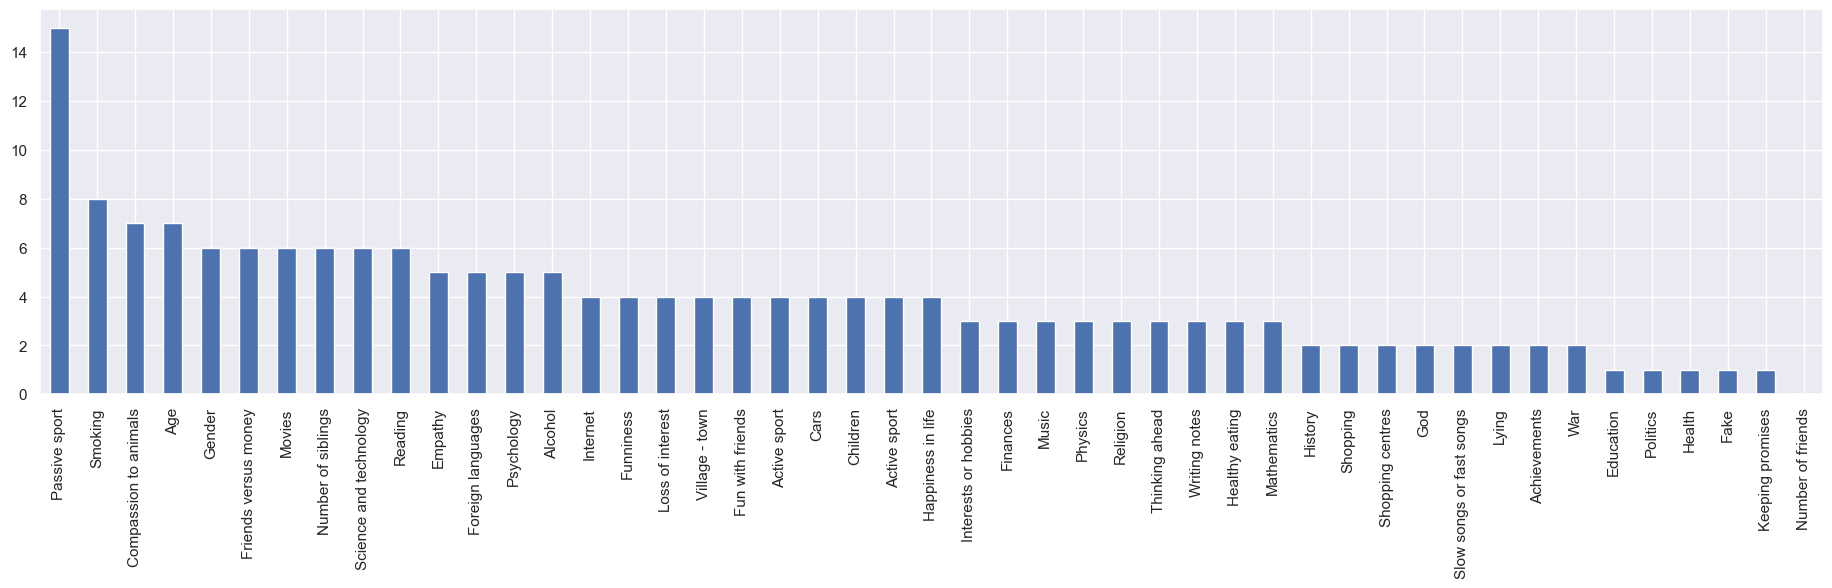

In [40]:
nulls = FilteredInterviewData.isnull().sum().sort_values(ascending=False)
nulls.plot(kind='bar', figsize=(23, 5))

In [104]:
# saving the dataframe
# myData.to_csv('myData.csv')

# myData.head()

Music  Slow songs or fast songs  Movies  History  Psychology  Politics  \
0    5.0                       3.0     5.0      1.0         5.0       1.0   
1    4.0                       4.0     5.0      1.0         3.0       4.0   
2    5.0                       5.0     5.0      1.0         2.0       1.0   
3    5.0                       3.0     5.0      4.0         4.0       5.0   
4    5.0                       3.0     5.0      3.0         2.0       3.0   

   Mathematics  Science and technology  Reading  Foreign languages  Religion  \
0          3.0                     4.0      3.0                5.0       1.0   
1          5.0                     3.0      4.0                5.0       1.0   
2          5.0                     2.0      5.0                5.0       5.0   
3          4.0                     3.0      5.0                4.0       4.0   
4          2.0                     3.0      5.0                3.0       4.0   

   Passive sport  Active sport  Fun with friends        Smoking  \
0            1.0           5.0               5.0   never smoked   
1            1.0           1.0               4.0   never smoked   
2            5.0           2.0               5.0  tried smoking   
3            1.0           1.0               2.0  former smoker   
4            3.0           1.0               4.0  tried smoking   

          Alcohol  Writing notes  Thinking ahead  Keeping promises  \
0     drink a lot            5.0             2.0               4.0   
1     drink a lot            4.0             4.0               4.0   
2     drink a lot            5.0             5.0               5.0   
3     drink a lot            4.0             3.0               4.0   
4  social drinker            2.0             5.0               4.0   

   Loss of interest  Friends versus money  Funniness  Fake  Empathy  \
0               1.0                   3.0        5.0   1.0      3.0   
1               3.0                   4.0        3.0   2.0      2.0   
2               1.0                   5.0        2.0   4.0      5.0   
3               5.0                   2.0        1.0   1.0      3.0   
4               2.0                   3.0        3.0   2.0      3.0   

   Compassion to animals  God  Number of friends  \
0                    5.0  1.0                  3   
1                    4.0  1.0                  3   
2                    4.0  5.0                  3   
3                    2.0  4.0                  1   
4                    3.0  5.0                  3   

                           Lying  Achievements  Happiness in life  \
0                          never           4.0                4.0   
1                      sometimes           2.0                4.0   
2                      sometimes           3.0                4.0   
3  only to avoid hurting someone           3.0                2.0   
4          everytime it suits me           3.0                3.0   

   Interests or hobbies  Finances   Age  Number of siblings  \
0                   3.0       3.0  20.0                 1.0   
1                   3.0       3.0  19.0                 2.0   
2                   5.0       2.0  20.0                 2.0   
3                   NaN       2.0  22.0                 1.0   
4                   3.0       4.0  20.0                 1.0   

                 Education Village - town  
0  college/bachelor degree        village  
1  college/bachelor degree           city  
2         secondary school           city  
3  college/bachelor degree           city  
4         secondary school        village

In [41]:
columnsList = FilteredInterviewData.columns[FilteredInterviewData.isna().any()].tolist()
print(columnsList)
print("Number of columns with missing values: ", len(columnsList))

['Music', 'Slow songs or fast songs', 'Movies', 'History', 'Psychology', 'Mathematics', 'Science and technology', 'Reading', 'Foreign languages', 'Religion', 'Passive sport', 'Active sport', 'War', 'Health', 'Healthy eating', 'Active sport', 'Fun with friends', 'Smoking', 'Alcohol', 'Writing notes', 'Thinking ahead', 'Keeping promises', 'Internet', 'Physics', 'Politics', 'Gender', 'Children', 'Loss of interest', 'Friends versus money', 'Funniness', 'Fake', 'Empathy', 'Compassion to animals', 'Shopping', 'Cars', 'Shopping centres', 'God', 'Lying', 'Achievements', 'Happiness in life', 'Interests or hobbies', 'Finances', 'Age', 'Number of siblings', 'Education', 'Village - town']
Number of columns with missing values:  46


### Convert all values to numerical values.

In [52]:
objectColumns = list(FilteredInterviewData.select_dtypes(['object']).columns)
for column in objectColumns:
    print(column +": "+ str(FilteredInterviewData[column].unique()))



Smoking: ['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan]
Alcohol: ['drink a lot' 'social drinker' 'never' nan]
Gender: ['female' 'male' nan]
Lying: ['never' 'sometimes' 'only to avoid hurting someone'
 'everytime it suits me' nan]
Education: ['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil'
 nan]
Village - town: ['village' 'city' nan]


In [ ]:
# # 5 objects
# print("Alcohol: "+str(FilteredInterviewData['Alcohol'].unique()))
# print("Smoking: "+str(FilteredInterviewData['Smoking'].unique()))
# print("Lying: "+str(FilteredInterviewData['Lying'].unique()))
# print("Education: "+str(FilteredInterviewData['Education'].unique()))
# print("Village - Town: "+str(FilteredInterviewData['Village - town'].unique()))

### Fill missing values with median, categorical data, median is okay

In [ ]:
FilteredInterviewData.head()

In [53]:
FilteredInterviewData.replace(['never', 'social drinker', 'drink a lot'], [1, 3, 5], inplace=True)
FilteredInterviewData.replace(['never smoked', 'tried smoking', 'current smoker', 'former smoker'], [0, 3, 4, 5], inplace=True)
FilteredInterviewData.replace(['female', 'male'], [5, 0], inplace=True)
FilteredInterviewData.replace(['never', 'sometimes', 'only to avoid hurting someone', 'everytime it suits me'], [0, 3, 4, 5], inplace=True)
FilteredInterviewData.replace(['currently a primary school pupil', 'primary school', 'secondary school', 'college/bachelor degree', 'masters degree', 'doctorate degree'], [0, 1, 2, 3, 4, 5], inplace=True)
FilteredInterviewData.replace(['village', 'city'], [5, 0],inplace=True)

<AxesSubplot:ylabel='Alcohol'>

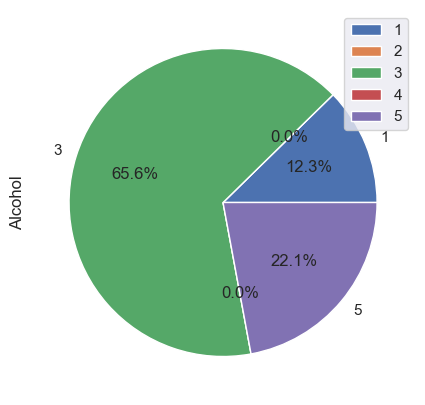

In [44]:
type_counts = FilteredInterviewData['Alcohol'].value_counts()
df2 = pd.DataFrame({'Alcohol': type_counts}, 
                     index = [1,2,3,4,5])
df2.plot.pie(y='Alcohol', figsize=(5,5), autopct='%1.1f%%')

In [54]:
FilteredInterviewData.fillna(FilteredInterviewData.median(),inplace=True)
FilteredInterviewData.isna().sum()

Music                       0
Slow songs or fast songs    0
Movies                      0
History                     0
Psychology                  0
Mathematics                 0
Science and technology      0
Reading                     0
Foreign languages           0
Religion                    0
Passive sport               0
Active sport                0
War                         0
Health                      0
Healthy eating              0
Fun with friends            0
Smoking                     0
Alcohol                     0
Writing notes               0
Thinking ahead              0
Keeping promises            0
Internet                    0
Physics                     0
Politics                    0
Gender                      0
Children                    0
Loss of interest            0
Friends versus money        0
Funniness                   0
Fake                        0
Empathy                     0
Compassion to animals       0
Shopping                    0
Cars      

In [13]:
FilteredInterviewData.describe()

Music  Slow songs or fast songs       Movies      History  \
count  1010.000000               1010.000000  1010.000000  1010.000000   
mean      4.732673                  3.327723     4.615842     3.206931   
std       0.663222                  0.833232     0.693268     1.262304   
min       1.000000                  1.000000     1.000000     1.000000   
25%       5.000000                  3.000000     4.000000     2.000000   
50%       5.000000                  3.000000     5.000000     3.000000   
75%       5.000000                  4.000000     5.000000     4.000000   
max       5.000000                  5.000000     5.000000     5.000000   

        Psychology    Politics  Mathematics  Science and technology  \
count  1010.000000  1010.00000  1010.000000             1010.000000   
mean      3.137624     2.59505     2.333663                3.232673   
std       1.255265     1.29395     1.350607                1.278906   
min       1.000000     1.00000     1.000000                1.000000   
25%       2.000000     1.00000     1.000000                2.000000   
50%       3.000000     2.00000     2.000000                3.000000   
75%       4.000000     4.00000     3.000000                4.000000   
max       5.000000     5.00000     5.000000                5.000000   

           Reading  Foreign languages     Religion  Passive sport  \
count  1010.000000        1010.000000  1010.000000    1010.000000   
mean      3.158416           3.779208     2.272277       3.382178   
std       1.491520           1.138463     1.317761       1.395334   
min       1.000000           1.000000     1.000000       1.000000   
25%       2.000000           3.000000     1.000000       2.000000   
50%       3.000000           4.000000     2.000000       3.000000   
75%       5.000000           5.000000     3.000000       5.000000   
max       5.000000           5.000000     5.000000       5.000000   

       Active sport          War       Health  Healthy eating  Active sport  \
count   1010.000000  1010.000000  1010.000000     1010.000000   1010.000000   
mean       3.290099     3.155446     3.250495        3.031683      3.290099   
std        1.501239     1.346947     1.074815        0.935473      1.501239   
min        1.000000     1.000000     1.000000        1.000000      1.000000   
25%        2.000000     2.000000     3.000000        3.000000      2.000000   
50%        3.000000     3.000000     3.000000        3.000000      3.000000   
75%        5.000000     4.000000     4.000000        4.000000      5.000000   
max        5.000000     5.000000     5.000000        5.000000      5.000000   

       Fun with friends      Smoking      Alcohol  Writing notes  \
count       1010.000000  1010.000000  1010.000000    1010.000000   
mean           4.559406     2.915842     3.194059       3.083168   
std            0.736245     1.652054     1.154971       1.406136   
min            2.000000     0.000000     1.000000       1.000000   
25%            4.000000     3.000000     3.000000       2.000000   
50%            5.000000     3.000000     3.000000       3.000000   
75%            5.000000     4.000000     3.000000       4.000000   
max            5.000000     5.000000     5.000000       5.000000   

       Thinking ahead  Keeping promises     Internet      Physics    Politics  \
count     1010.000000       1010.000000  1010.000000  1010.000000  1010.00000   
mean         3.412871          3.987129     4.175248     2.064356     2.59505   
std          1.135442          0.898646     0.918902     1.225278     1.29395   
min          1.000000          1.000000     1.000000     1.000000     1.00000   
25%          3.000000          3.000000     4.000000     1.000000     1.00000   
50%          3.000000          4.000000     4.000000     2.000000     2.00000   
75%          4.000000          5.000000     5.000000     3.000000     4.00000   
max          5.000000          5.000000     5.000000     5.000000     5.00000   

            Gender     Childr

In [46]:
columns=pd.read_csv('columns.csv')
columns.loc[columns['short'].isin(myColumns)].reset_index(drop=True)

original  \
0                         I enjoy listening to music.   
1                                           I prefer.   
2                     I really enjoy watching movies.   
3                                          War movies   
4                                             History   
5                                          Psychology   
6                                            Politics   
7                                         Mathematics   
8                                             Physics   
9                                            Internet   
10                                     Poetry reading   
11                                  Foreign languages   
12                                               Cars   
13                                           Religion   
14                       Sport and leisure activities   
15                         Sport at competitive level   
16                                           Shopping   
17                             Science and technology   
18                                        Socializing   
19                                     Smoking habits   
20                                           Drinking   
21                   I live a very healthy lifestyle.   
22   I always make a list so I don't forget anything.   
23  I look at things from all different angles bef...   
24                         I always keep my promises.   
25  I can fall for someone very quickly and then c...   
26  I would rather have lots of friends than lots ...   
27               I always try to be the funniest one.   
28                      I can be two faced sometimes.   
29                            I am emphatetic person.   
30             I don't like seeing animals suffering.   
31                           I worry about my health.   
32                                  I believe in God.   
33                            I have lots of friends.   
34                              Do you lie to others?   
35  I always let other people know about my achiev...   
36                        I enjoy childrens' company.   
37                      I am 100% happy with my life.   
38       I have many different hobbies and interests.   
39                        I save all the money I can.   
40           I enjoy going to large shopping centres.   
41                                                Age   
42                     How many siblings do you have?   
43                                             Gender   
44                         Highest education achieved   
45                  I spent most of my childhood in a   

                       short  
0                      Music  
1   Slow songs or fast songs  
2                     Movies  
3                        War  
4                    History  
5                 Psychology  
6                   Politics  
7                Mathematics  
8                    Physics  
9                   Internet  
10                   Reading  
11         Foreign languages  
12                      Cars  
13                  Religion  
14             Passive sport  
15              Active sport  
16                  Shopping  
17    Science and technology  
18          Fun with friends  
19                   Smoking  
20                   Alcohol  
21            Healthy eating  
22             Writing notes  
23            Thinking ahead  
24          Keeping promises  
25          Loss of interest  
26      Friends versus money  
27                 Funniness  
28                      Fake  
29                   Empathy  
30     Compassion to animals  
31                    Health  
32                       God  
33         Number of friends  
34                     Lying  
35              Achievements  
36                  Children  
37         Happiness in life  
38      Interests or hobbies  
39                  Finances  
40          Shopping centres  
41                       Age  
42        Number of siblings  
4

[Text(0.5, 0, 'Music'),
 Text(1.5, 0, 'Slow songs or fast songs'),
 Text(2.5, 0, 'Movies'),
 Text(3.5, 0, 'History'),
 Text(4.5, 0, 'Psychology'),
 Text(5.5, 0, 'Mathematics'),
 Text(6.5, 0, 'Science and technology'),
 Text(7.5, 0, 'Reading'),
 Text(8.5, 0, 'Foreign languages'),
 Text(9.5, 0, 'Religion'),
 Text(10.5, 0, 'Passive sport'),
 Text(11.5, 0, 'Active sport'),
 Text(12.5, 0, 'War'),
 Text(13.5, 0, 'Health'),
 Text(14.5, 0, 'Healthy eating'),
 Text(15.5, 0, 'Active sport'),
 Text(16.5, 0, 'Fun with friends'),
 Text(17.5, 0, 'Smoking'),
 Text(18.5, 0, 'Alcohol'),
 Text(19.5, 0, 'Writing notes'),
 Text(20.5, 0, 'Thinking ahead'),
 Text(21.5, 0, 'Keeping promises'),
 Text(22.5, 0, 'Internet'),
 Text(23.5, 0, 'Physics'),
 Text(24.5, 0, 'Politics'),
 Text(25.5, 0, 'Gender'),
 Text(26.5, 0, 'Children'),
 Text(27.5, 0, 'Loss of interest'),
 Text(28.5, 0, 'Friends versus money'),
 Text(29.5, 0, 'Funniness'),
 Text(30.5, 0, 'Fake'),
 Text(31.5, 0, 'Empathy'),
 Text(32.5, 0, 'Compassion 

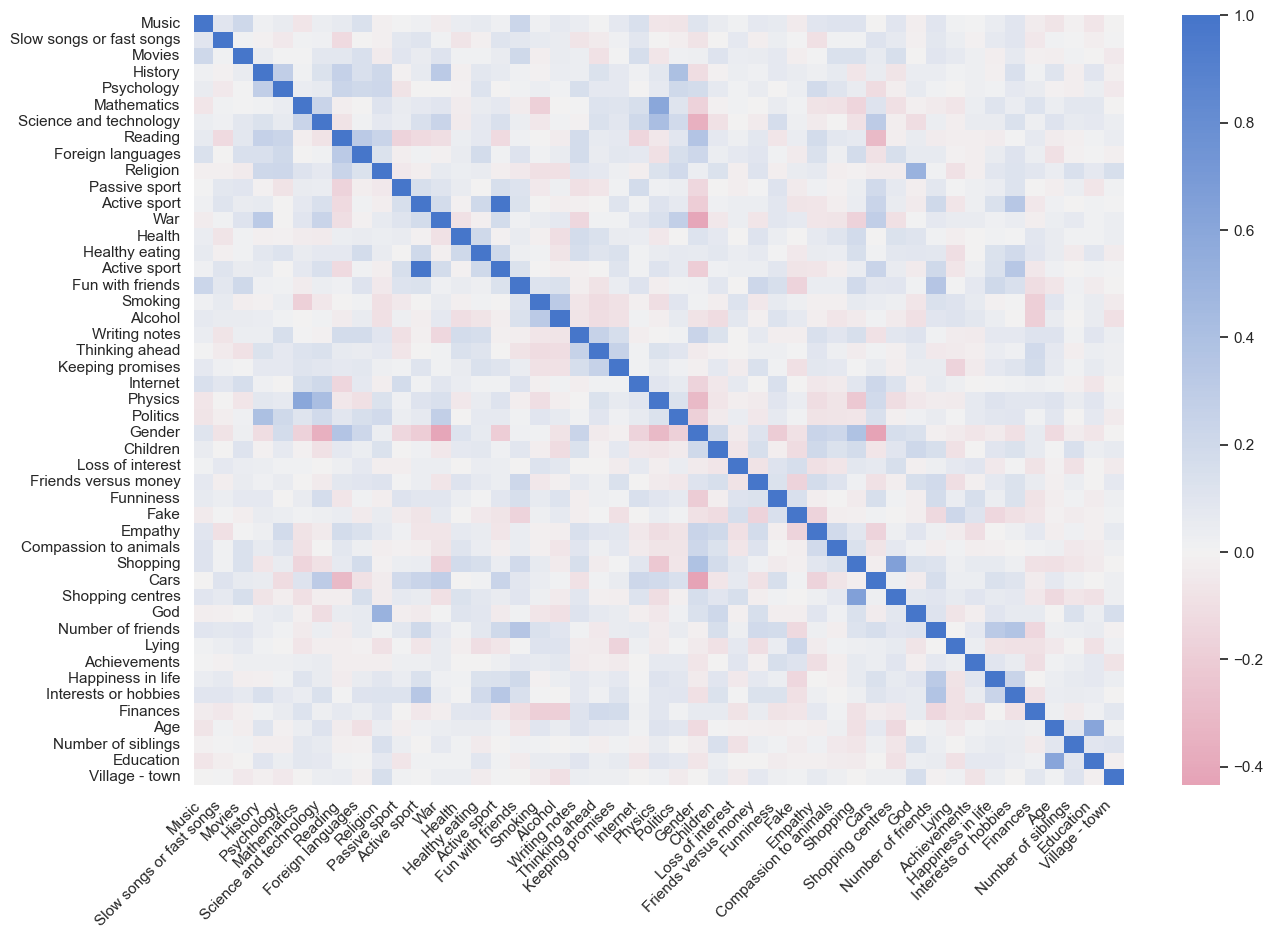

In [47]:
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.heatmap(FilteredInterviewData.corr(), center=0.00, cmap=sns.diverging_palette(0, 255,as_cmap=True))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [55]:
corr_matrix = FilteredInterviewData.corr()

# Sort the correlation matrix in descending order
sorted_corr_matrix = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove duplicates
sorted_corr_matrix = sorted_corr_matrix[sorted_corr_matrix.index.get_level_values(0) != sorted_corr_matrix.index.get_level_values(1)]

# Show the sorted list of correlations
sorted_corr_matrix.head(50)


Shopping                Shopping centres          0.650524
Shopping centres        Shopping                  0.650524
Education               Age                       0.610533
Age                     Education                 0.610533
Mathematics             Physics                   0.593086
Physics                 Mathematics               0.593086
Religion                God                       0.507092
God                     Religion                  0.507092
Cars                    Gender                    0.434919
Gender                  Cars                      0.434919
Physics                 Science and technology    0.419245
Science and technology  Physics                   0.419245
Gender                  War                       0.413348
War                     Gender                    0.413348
History                 Politics                  0.400856
Politics                History                   0.400856
Shopping                Gender                    0.3837

In [56]:
# Calculate the correlation matrix
corr_matrix = FilteredInterviewData.corr()

# Loop over each column in the correlation matrix
for col in corr_matrix.columns:
    print("Most correlated features with", col, ":")
    # Get the 5 most correlated features with the current column
    most_correlated = corr_matrix[col].sort_values(ascending=False).head(6).index[1:]
    print(most_correlated)
    print("\n")

Most correlated features with Music :
Index(['Fun with friends', 'Movies', 'Internet', 'Foreign languages',
       'Shopping'],
      dtype='object')


Most correlated features with Slow songs or fast songs :
Index(['Cars', 'Active sport', 'Interests or hobbies', 'Music', 'Internet'], dtype='object')


Most correlated features with Movies :
Index(['Music', 'Fun with friends', 'Internet', 'Shopping centres',
       'Foreign languages'],
      dtype='object')


Most correlated features with History :
Index(['Politics', 'War', 'Psychology', 'Reading', 'Religion'], dtype='object')


Most correlated features with Psychology :
Index(['History', 'Reading', 'Religion', 'Politics', 'Foreign languages'], dtype='object')


Most correlated features with Mathematics :
Index(['Physics', 'Science and technology', 'Internet', 'Thinking ahead',
       'Finances'],
      dtype='object')


Most correlated features with Science and technology :
Index(['Physics', 'Cars', 'Mathematics', 'War', 'Internet'], 

In [58]:
corr_matrix = FilteredInterviewData.corr()

# Get the sorted list of correlation between features
sorted_corr_matrix = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove duplicates
sorted_corr_matrix = sorted_corr_matrix[sorted_corr_matrix.index.get_level_values(0) != sorted_corr_matrix.index.get_level_values(1)]

# Get the 15 most correlated feature pairs
most_correlated_15 = sorted_corr_matrix.head(15)

# Get the combination of the 15 most correlated features
most_correlated_features = set()
for index, value in most_correlated_15.iteritems():
    feature1, feature2 = index
    most_correlated_features.add(feature1)
    most_correlated_features.add(feature2)

# Show the combination of the 15 most correlated features
print(most_correlated_features)

{'Shopping centres', 'Mathematics', 'History', 'God', 'Science and technology', 'Religion', 'Politics', 'Shopping', 'Gender', 'Physics', 'Age', 'Cars', 'Education', 'War'}


In [59]:
FilteredInterviewData.columns

Index(['Music', 'Slow songs or fast songs', 'Movies', 'History', 'Psychology',
       'Mathematics', 'Science and technology', 'Reading', 'Foreign languages',
       'Religion', 'Passive sport', 'Active sport', 'War', 'Health',
       'Healthy eating', 'Fun with friends', 'Smoking', 'Alcohol',
       'Writing notes', 'Thinking ahead', 'Keeping promises', 'Internet',
       'Physics', 'Politics', 'Gender', 'Children', 'Loss of interest',
       'Friends versus money', 'Funniness', 'Fake', 'Empathy',
       'Compassion to animals', 'Shopping', 'Cars', 'Shopping centres', 'God',
       'Number of friends', 'Lying', 'Achievements', 'Happiness in life',
       'Interests or hobbies', 'Finances', 'Age', 'Number of siblings',
       'Education', 'Village - town'],
      dtype='object')

In [60]:
FilteredInterviewDataCopy = FilteredInterviewData.copy()


In [85]:
PersonalityDF = FilteredInterviewDataCopy[['Thinking ahead', 'Fake', 'Lying', 'Happiness in life', 'Education', 'Psychology', 'Village - town', 'History']]

#PsychologicyDF = FilteredInterviewDataCopy[['God', 'Alcohol', 'Age', 'Education', 'Loneliness', 'Reading', 'Socializing', 'Mood swings']]

ReligiousPersonalityDF = FilteredInterviewDataCopy[['God', 'Religion', 'Age', 'Education', 'History', 'Politics', 'Number of friends', 'Fun with friends']]

WarReligionScienceDF = FilteredInterviewDataCopy[['God', 'Religion', 'Science and technology', 'Education']]

AddictionHealthDF = FilteredInterviewDataCopy[['Science and technology', 'Alcohol', 'Smoking', 'Health', 'Healthy eating', 'Active sport']]

FriendsInterestsDF = FilteredInterviewDataCopy[['Fun with friends', 'Internet', 'Physics', 'Politics', 'Happiness in life']]

FinancesDF = FilteredInterviewDataCopy[['Finances', 'Gender', 'Children', 'Shopping', 'Shopping centres', 'Village - town']]

listOfDFs = [PersonalityDF, ReligiousPersonalityDF, WarReligionScienceDF, AddictionHealthDF, FriendsInterestsDF, FinancesDF]




[Text(0.5, 0, 'Music'),
 Text(1.5, 0, 'Slow songs or fast songs'),
 Text(2.5, 0, 'Movies'),
 Text(3.5, 0, 'History'),
 Text(4.5, 0, 'Psychology'),
 Text(5.5, 0, 'Mathematics'),
 Text(6.5, 0, 'Science and technology'),
 Text(7.5, 0, 'Reading'),
 Text(8.5, 0, 'Foreign languages'),
 Text(9.5, 0, 'Religion'),
 Text(10.5, 0, 'Passive sport'),
 Text(11.5, 0, 'Active sport'),
 Text(12.5, 0, 'War'),
 Text(13.5, 0, 'Health'),
 Text(14.5, 0, 'Healthy eating'),
 Text(15.5, 0, 'Fun with friends'),
 Text(16.5, 0, 'Smoking'),
 Text(17.5, 0, 'Alcohol'),
 Text(18.5, 0, 'Writing notes'),
 Text(19.5, 0, 'Thinking ahead'),
 Text(20.5, 0, 'Keeping promises'),
 Text(21.5, 0, 'Internet'),
 Text(22.5, 0, 'Physics'),
 Text(23.5, 0, 'Politics'),
 Text(24.5, 0, 'Gender'),
 Text(25.5, 0, 'Children'),
 Text(26.5, 0, 'Loss of interest'),
 Text(27.5, 0, 'Friends versus money'),
 Text(28.5, 0, 'Funniness'),
 Text(29.5, 0, 'Fake'),
 Text(30.5, 0, 'Empathy'),
 Text(31.5, 0, 'Compassion to animals'),
 Text(32.5, 0, 'Sh

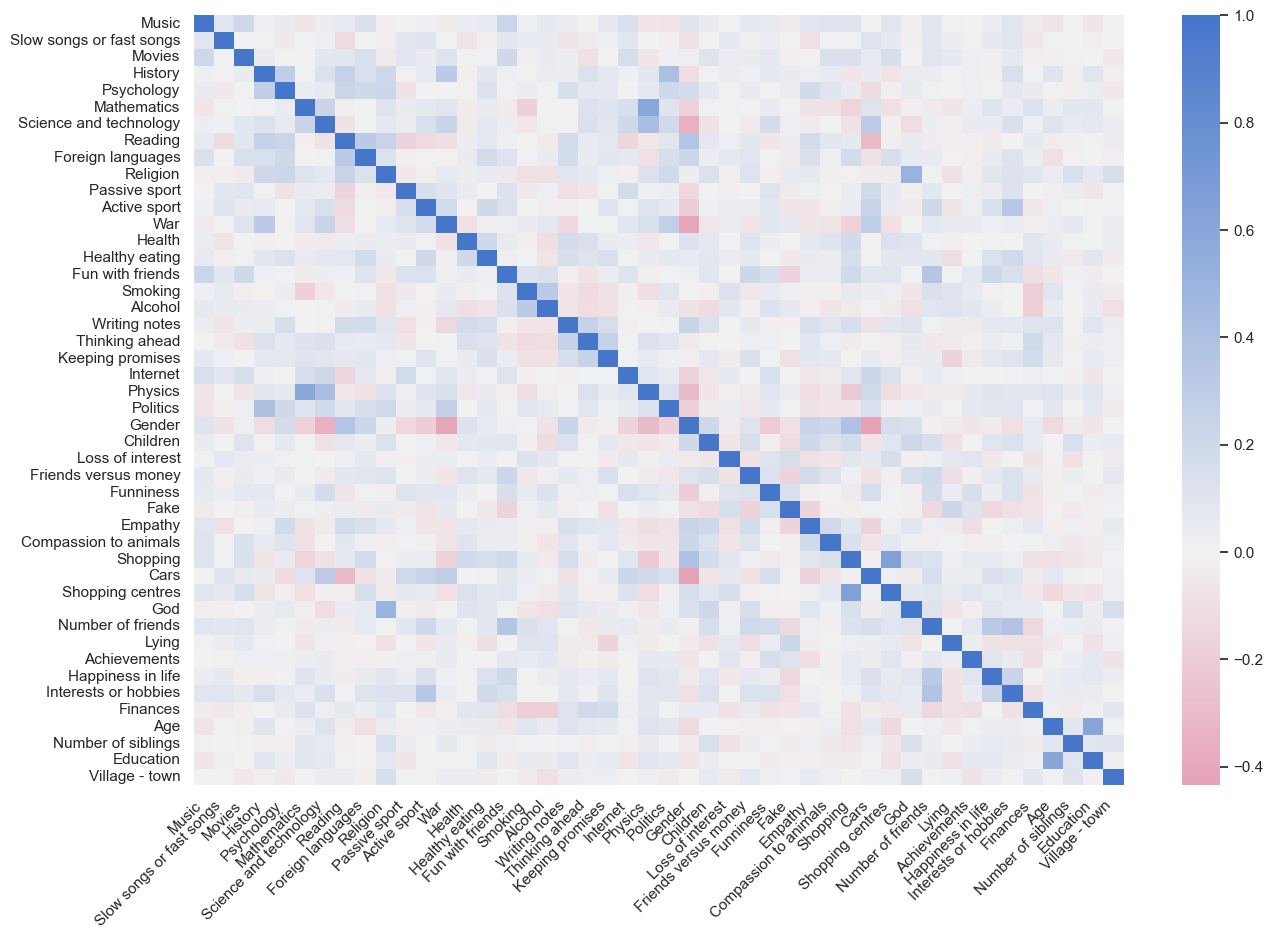

In [66]:
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.heatmap(FilteredInterviewDataCopy.corr(), center=0.00, cmap=sns.diverging_palette(0, 255,as_cmap=True))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [67]:
corr_matrix = FilteredInterviewDataCopy.corr()

# Sort the correlation matrix in descending order
sorted_corr_matrix = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove duplicates
sorted_corr_matrix = sorted_corr_matrix[sorted_corr_matrix.index.get_level_values(0) != sorted_corr_matrix.index.get_level_values(1)]

# Show the sorted list of correlations
sorted_corr_matrix.head(30)

Shopping                Shopping centres          0.650524
Shopping centres        Shopping                  0.650524
Education               Age                       0.610533
Age                     Education                 0.610533
Mathematics             Physics                   0.593086
Physics                 Mathematics               0.593086
Religion                God                       0.507092
God                     Religion                  0.507092
Cars                    Gender                    0.434919
Gender                  Cars                      0.434919
Physics                 Science and technology    0.419245
Science and technology  Physics                   0.419245
Gender                  War                       0.413348
War                     Gender                    0.413348
History                 Politics                  0.400856
Politics                History                   0.400856
Shopping                Gender                    0.3837

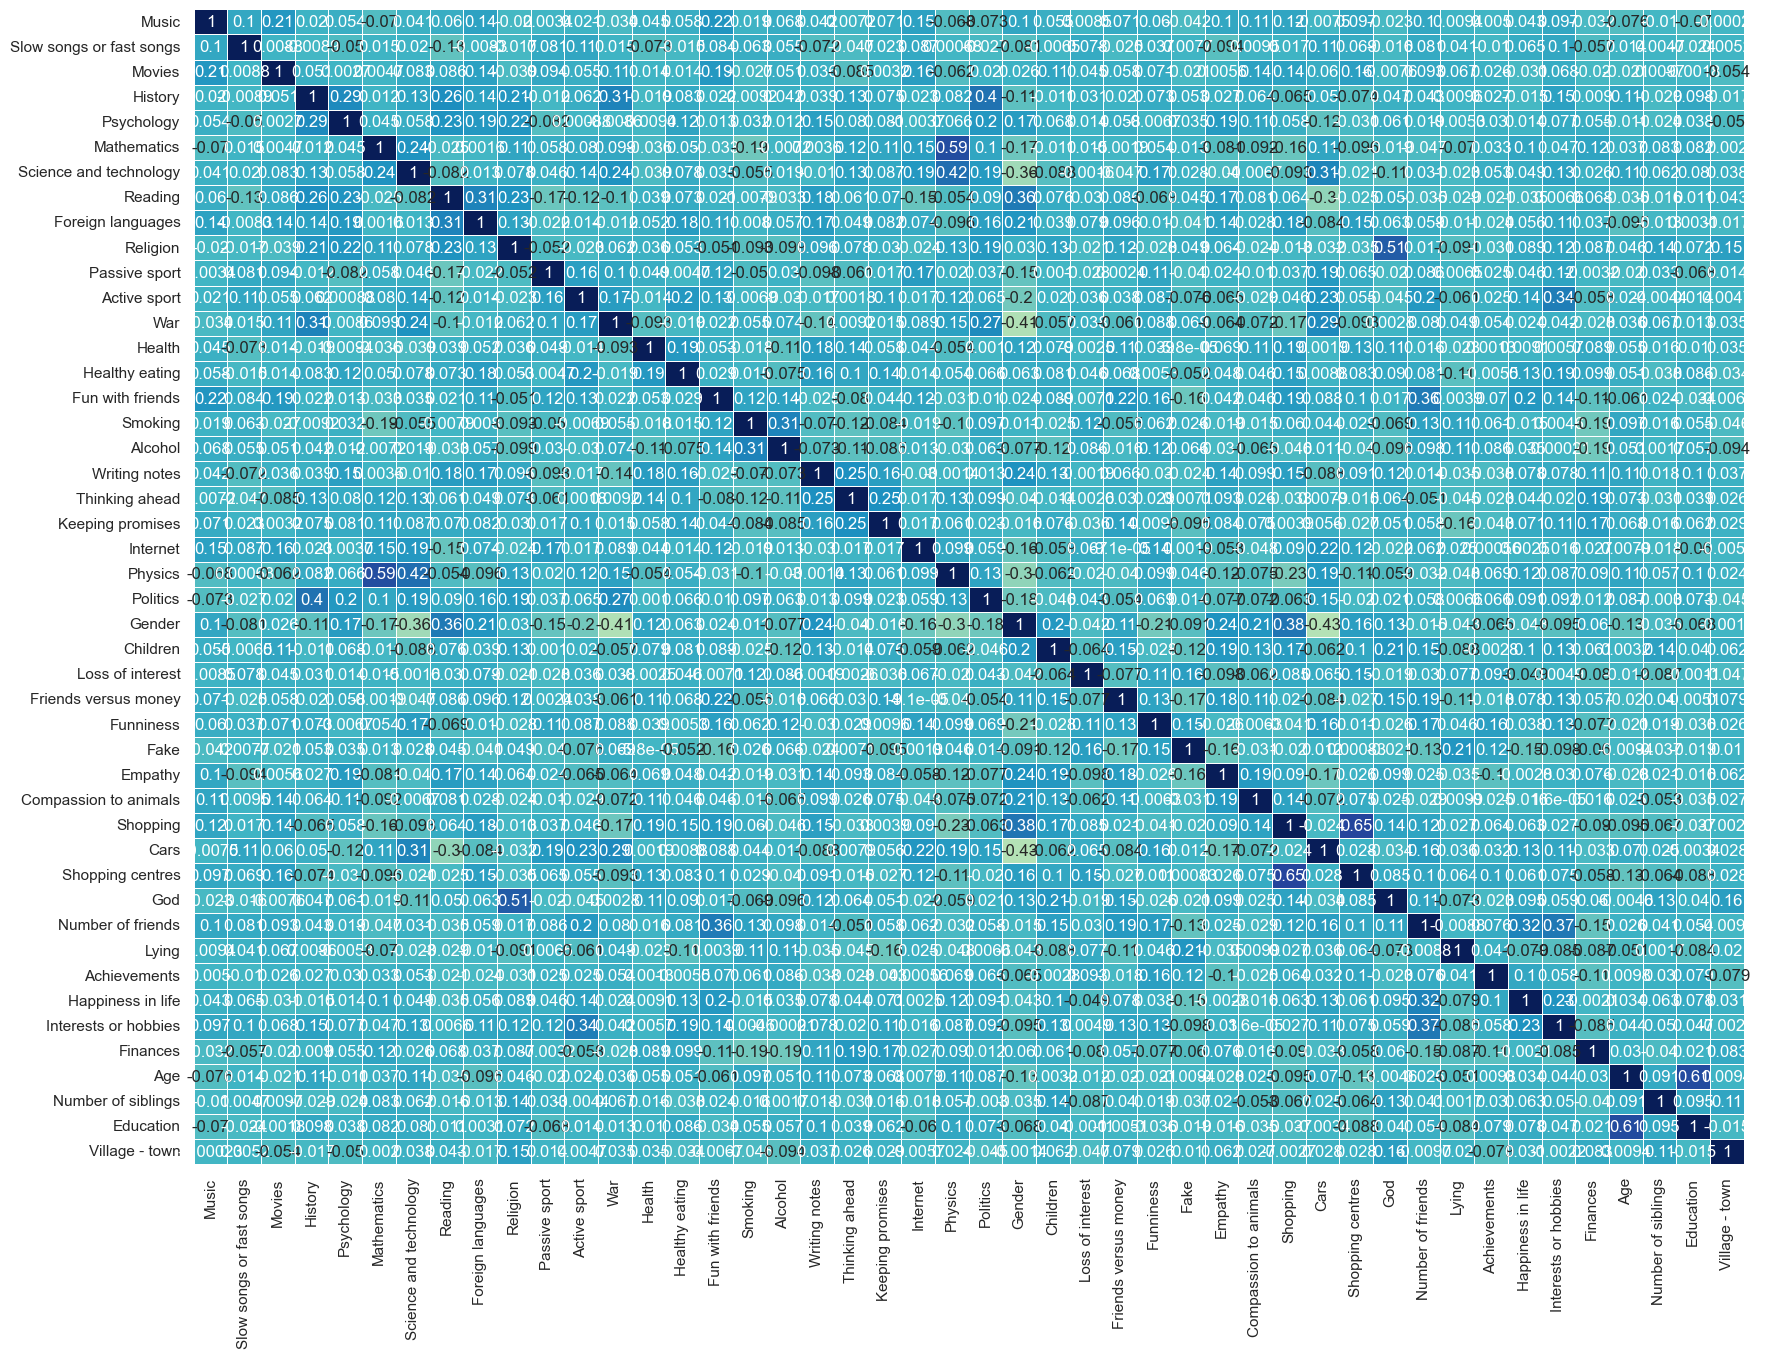

In [68]:
plt.figure(figsize=(20,15))
sns.heatmap(FilteredInterviewDataCopy.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [ ]:
# myData=myData.drop(columns=['God', 'Village - town'])

<AxesSubplot:xlabel='Smoking', ylabel='Finances'>

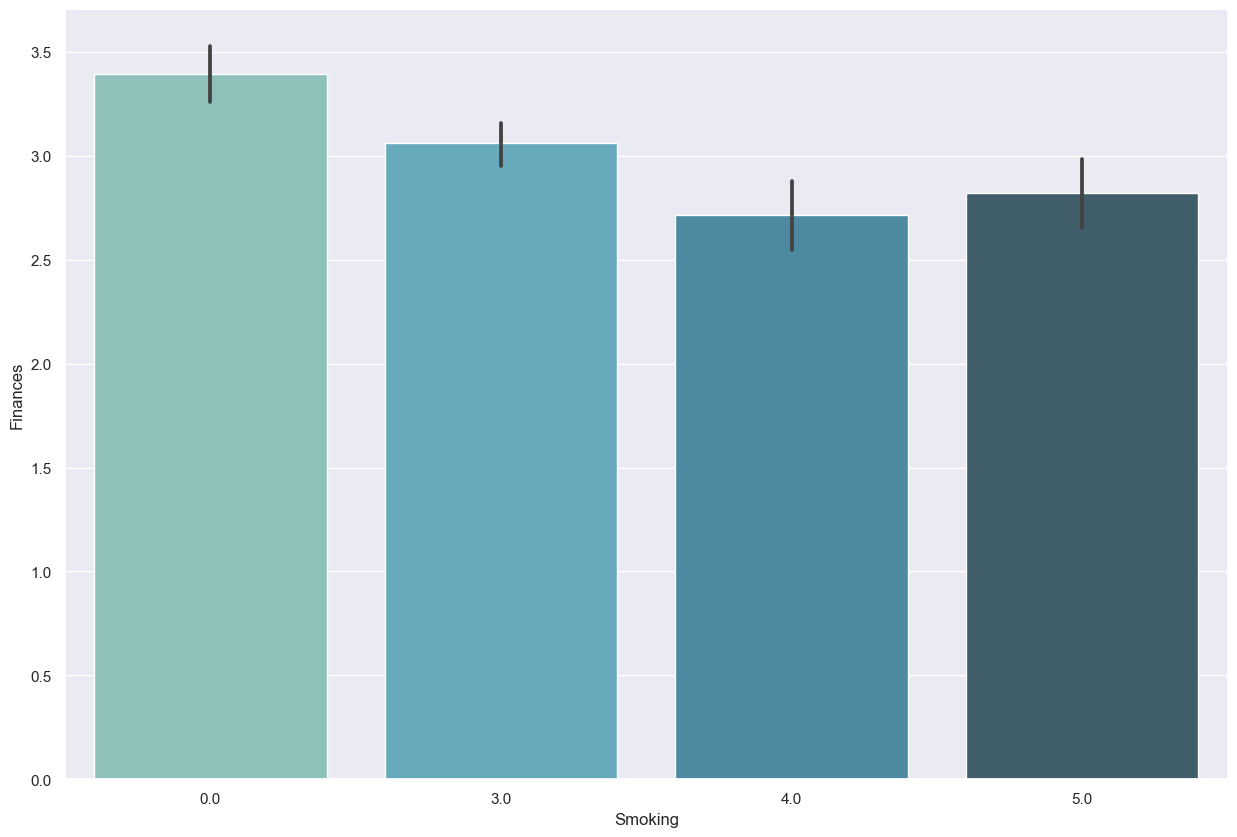

In [69]:
sns.barplot(x=FilteredInterviewDataCopy['Smoking'], y=FilteredInterviewDataCopy['Finances'], palette="GnBu_d")


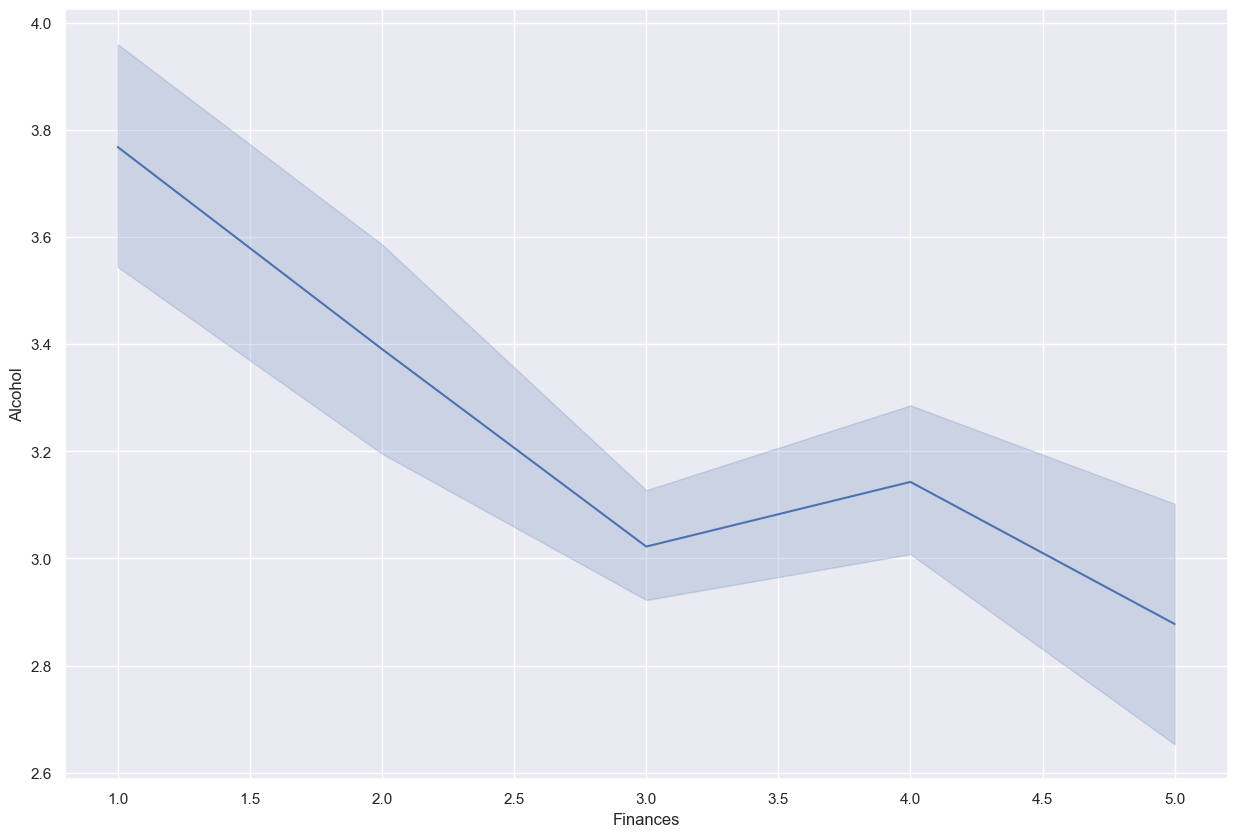

In [70]:
sns.lineplot(x = FilteredInterviewDataCopy['Finances'], y=FilteredInterviewDataCopy['Alcohol'], palette="GnBu_d");


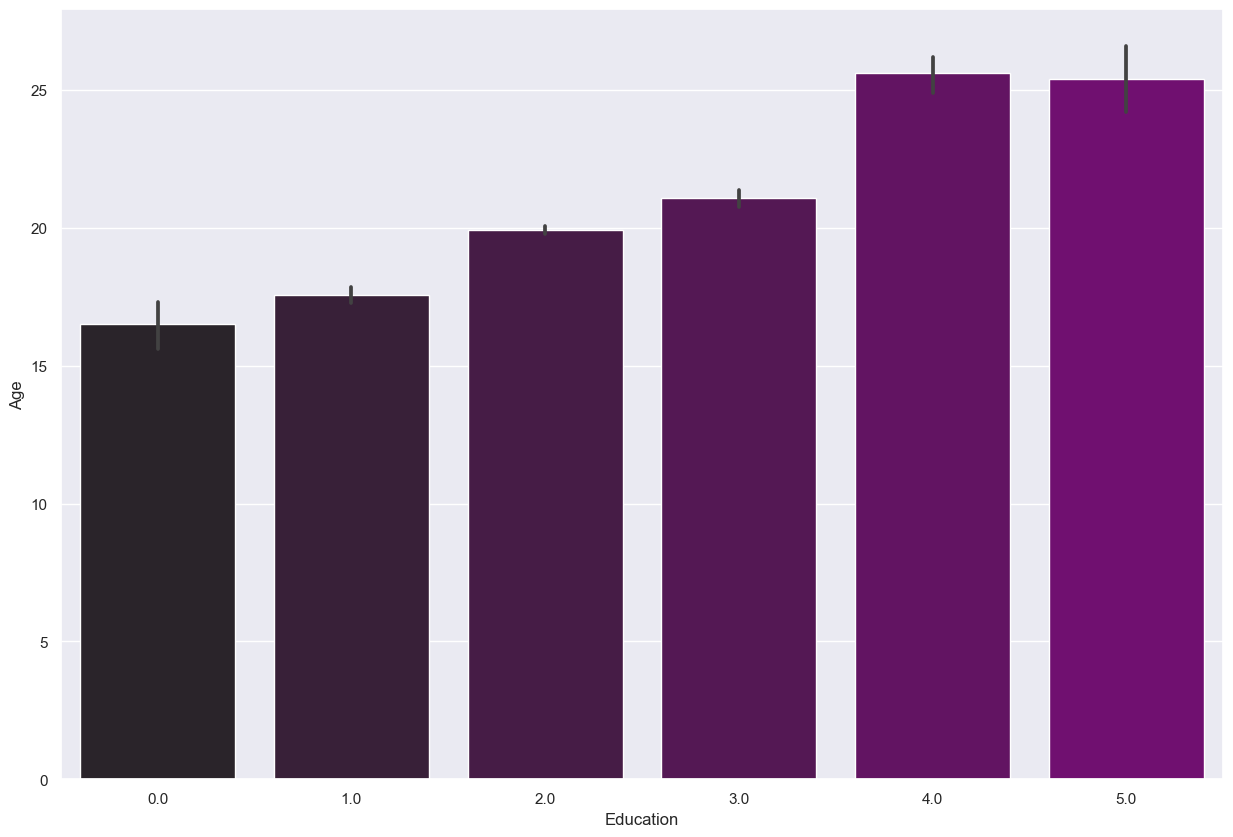

In [71]:
sns.barplot(x=FilteredInterviewDataCopy['Education'], y=FilteredInterviewDataCopy['Age'], palette=sns.dark_palette("purple"));


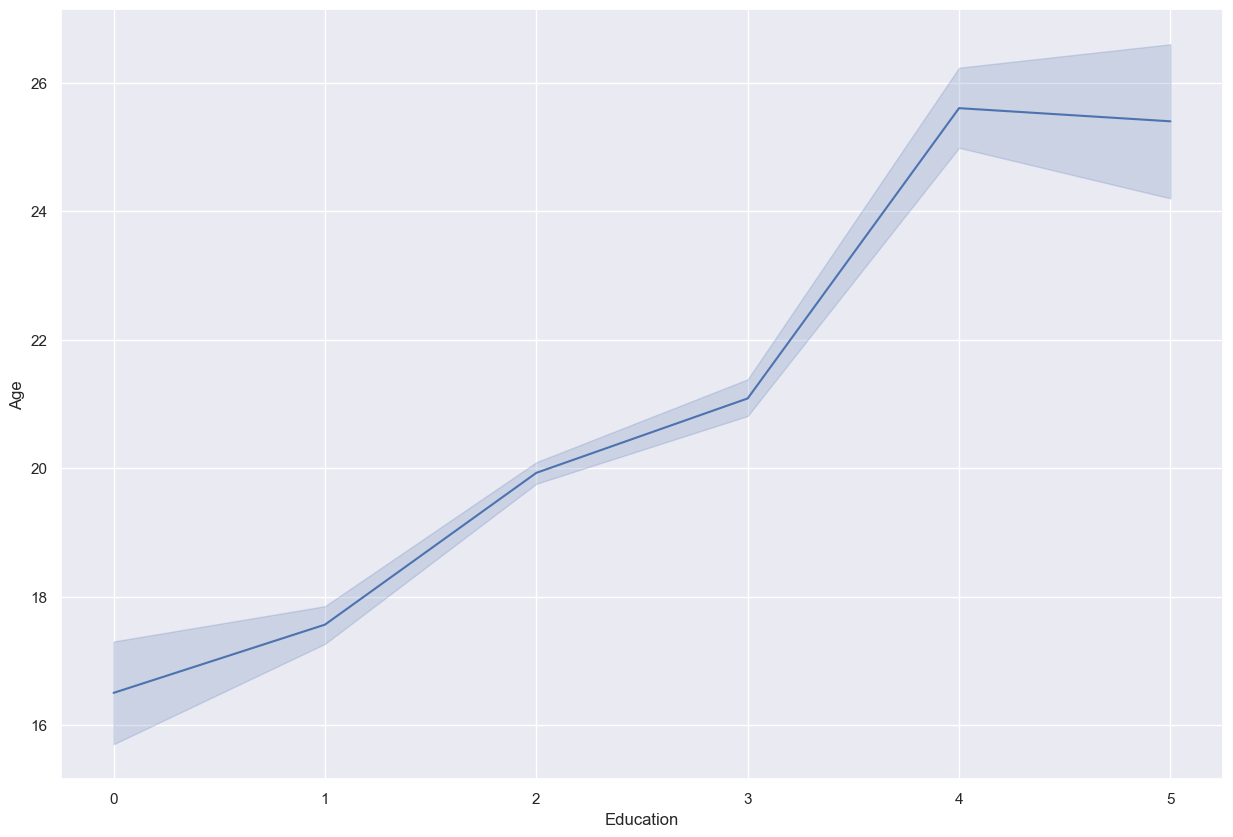

In [ ]:
sns.lineplot(x=FilteredInterviewDataCopy['Education'], y=FilteredInterviewDataCopy['Age'], palette=sns.dark_palette("purple"));

## Clustering

### Helper functions

In [106]:
# 3d scatterplot using plotly
def printClusters3DWithKMeans(DF):

    wcss = []
    for i in range(2, 9):
        km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 3000, n_init = 10,random_state=0)
        km.fit(DF)
        y_clusters = km.fit_predict(DF)
        wcss.append(km.inertia_)
    Scene = dict(xaxis = dict(title  = DF.columns[0]),yaxis = dict(title  = DF.columns[1]),zaxis = dict(title  = DF.columns[2]))

    # model.labels_ is nothing but the predicted clusters i.e y_clusters
    labels = km.labels_
    trace = go.Scatter3d(x=DF[DF.columns[0]], y=DF[DF.columns[1]], z=DF[DF.columns[2]], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
    layout = go.Layout(margin=dict(l=0,r=0), scene = Scene, height = 800, width = 800)
    data = [trace]
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [ ]:
def printClusters(dataset_, labels_, indices_=[0, 1, 2]):
    plt.figure(figsize = (12, 12))
    ax = plt.axes(projection='3d')
    for cluster in set(labels_):
        cluster_mask = [elem == cluster for elem in labels_]
        
        zdata = dataset_.iloc[cluster_mask, indices_[0]]
        xdata = dataset_.iloc[cluster_mask, indices_[1]]
        ydata = dataset_.iloc[cluster_mask, indices_[2]]
        ax.scatter3D(xdata, ydata, zdata)
        
        ax.set_xlabel(dataset_.columns[indices_[0]])
        ax.set_ylabel(dataset_.columns[indices_[1]])
        ax.set_zlabel(dataset_.columns[indices_[2]])

### K-means clustering

In [115]:
for DF in listOfDFs:
    print(DF.columns)
    printClusters3DWithKMeans(DF)

Index(['Thinking ahead', 'Fake', 'Lying', 'Happiness in life', 'Education',
       'Psychology', 'Village - town', 'History'],
      dtype='object')


Index(['God', 'Religion', 'Age', 'Education', 'History', 'Politics',
       'Number of friends', 'Fun with friends'],
      dtype='object')


Index(['God', 'Religion', 'Science and technology', 'Education'], dtype='object')


Index(['Science and technology', 'Alcohol', 'Smoking', 'Health',
       'Healthy eating', 'Active sport'],
      dtype='object')


Index(['Fun with friends', 'Internet', 'Physics', 'Politics',
       'Happiness in life'],
      dtype='object')


Index(['Finances', 'Gender', 'Children', 'Shopping', 'Shopping centres',
       'Village - town'],
      dtype='object')


### myData K-means

In [72]:
FilteredInterviewDataCopy.head()

Music  Slow songs or fast songs  Movies  History  Psychology  Mathematics  \
0    5.0                       3.0     5.0      1.0         5.0          3.0   
1    4.0                       4.0     5.0      1.0         3.0          5.0   
2    5.0                       5.0     5.0      1.0         2.0          5.0   
3    5.0                       3.0     5.0      4.0         4.0          4.0   
4    5.0                       3.0     5.0      3.0         2.0          2.0   

   Science and technology  Reading  Foreign languages  Religion  \
0                     4.0      3.0                5.0       1.0   
1                     3.0      4.0                5.0       1.0   
2                     2.0      5.0                5.0       5.0   
3                     3.0      5.0                4.0       4.0   
4                     3.0      5.0                3.0       4.0   

   Passive sport  Active sport  War  Health  Healthy eating  Fun with friends  \
0            1.0           5.0  1.0     1.0             4.0               5.0   
1            1.0           1.0  1.0     4.0             3.0               4.0   
2            5.0           2.0  2.0     2.0             3.0               5.0   
3            1.0           1.0  3.0     1.0             3.0               2.0   
4            3.0           1.0  3.0     3.0             4.0               4.0   

   Smoking  Alcohol  Writing notes  Thinking ahead  Keeping promises  \
0      0.0      5.0            5.0             2.0               4.0   
1      0.0      5.0            4.0             4.0               4.0   
2      3.0      5.0            5.0             5.0               5.0   
3      5.0      5.0            4.0             3.0               4.0   
4      3.0      3.0            2.0             5.0               4.0   

   Internet  Physics  Politics  Gender  Children  Loss of interest  \
0       5.0      3.0       1.0     5.0       5.0               1.0   
1       4.0      2.0       4.0     5.0       2.0               3.0   
2       4.0      2.0       1.0     5.0       4.0               1.0   
3       3.0      1.0       5.0     5.0       2.0               5.0   
4       2.0      2.0       3.0     5.0       5.0               2.0   

   Friends versus money  Funniness  Fake  Empathy  Compassion to animals  \
0                   3.0        5.0   1.0      3.0                    5.0   
1                   4.0        3.0   2.0      2.0                    4.0   
2                   5.0        2.0   4.0      5.0                    4.0   
3                   2.0        1.0   1.0      3.0                    2.0   
4                   3.0        3.0   2.0      3.0                    3.0   

   Shopping  Cars  Shopping centres  God  Number of friends  Lying  \
0       4.0   1.0               4.0  1.0                  3    1.0   
1       3.0   2.0               4.0  1.0                  3    3.0   
2       4.0   1.0               4.0  5.0                  3    3.0   
3       4.0   1.0               4.0  4.0                  1    4.0   
4       3.0   3.0               3.0  5.0                  3    5.0   

   Achievements  Happiness in life  Interests or hobbies  Finances   Age  \
0           4.0                4.0                   3.0       3.0  20.0   
1           2.0                4.0                   3.0       3.0  19.0   
2           3.0                4.0                   5.0       2.0  20.0   
3           3.0                2.0                   4.0       2.0  22.0   
4           3.0                3.0                   3.0       4.0  20.0   

   Number of siblings  Education  Village - town  
0                 1.0        3.0             5.0  
1                 2.0        3.0             0.0  
2                 2.0        2.0             0.0  
3                 1.0        3.0             0.0  
4                 1.0        2.0             5.0

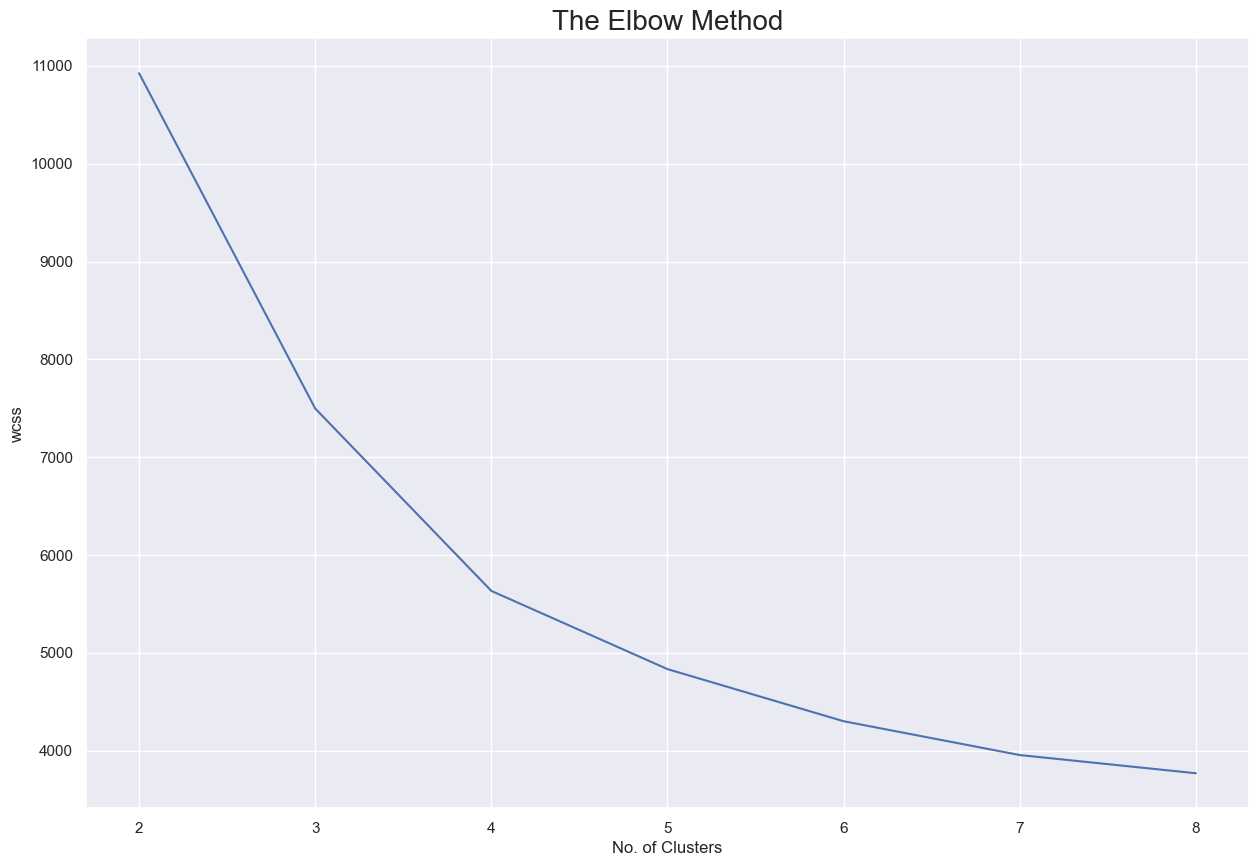

In [109]:
x=FinancesDF
wcss = []
for i in range(2, 9):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 3000, n_init = 10,random_state=0)
    km.fit(x)
    y_clusters = km.fit_predict(x)
    wcss.append(km.inertia_)

plt.plot(range(2, 9), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()



In [74]:
x.head()

Finances  Gender  Children  Shopping  Shopping centres  Village - town
0       3.0     5.0       5.0       4.0               4.0             5.0
1       3.0     5.0       2.0       3.0               4.0             0.0
2       2.0     5.0       4.0       4.0               4.0             0.0
3       2.0     5.0       2.0       4.0               4.0             0.0
4       4.0     5.0       5.0       3.0               3.0             5.0

In [110]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Finances -->'),yaxis = dict(title  = 'Shopping--->'),zaxis = dict(title  = 'Gender-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = km.labels_
trace = go.Scatter3d(x=x['Finances'], y=x['Shopping'], z=x['Gender'], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0), scene = Scene, height = 800, width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

### newData K-means

In [ ]:
x=newData
wcss = []
for i in range(2, 9):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 3000, n_init = 10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(2, 9), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# znaci sutra radim sistem ili brisem sve pajtone zauvek ne mogu milion verzija istih programa vise
kl = KneeLocator( range(2, 9), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [ ]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000, n_init = 30)
km.fit(x)
y_means=km.predict(x)

### Calculating Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("Silhouette score: ", silhouette_score(x,y_means))
print("Davies-Bouldin score: ", davies_bouldin_score(x,y_means))


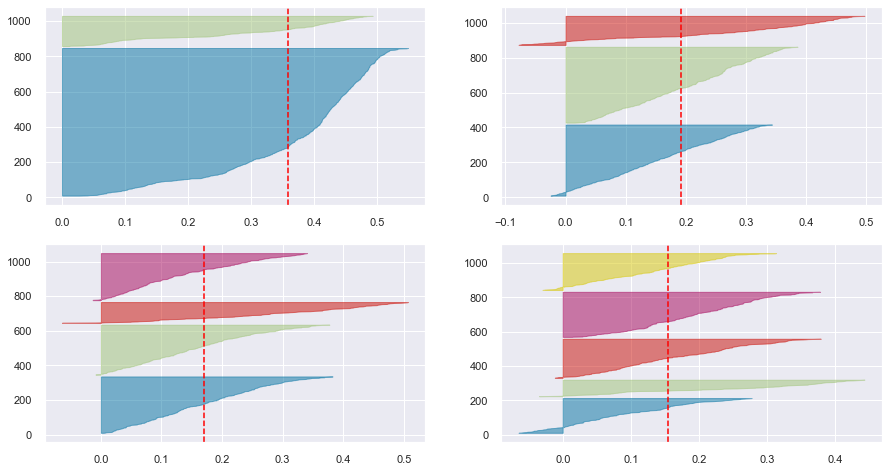

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

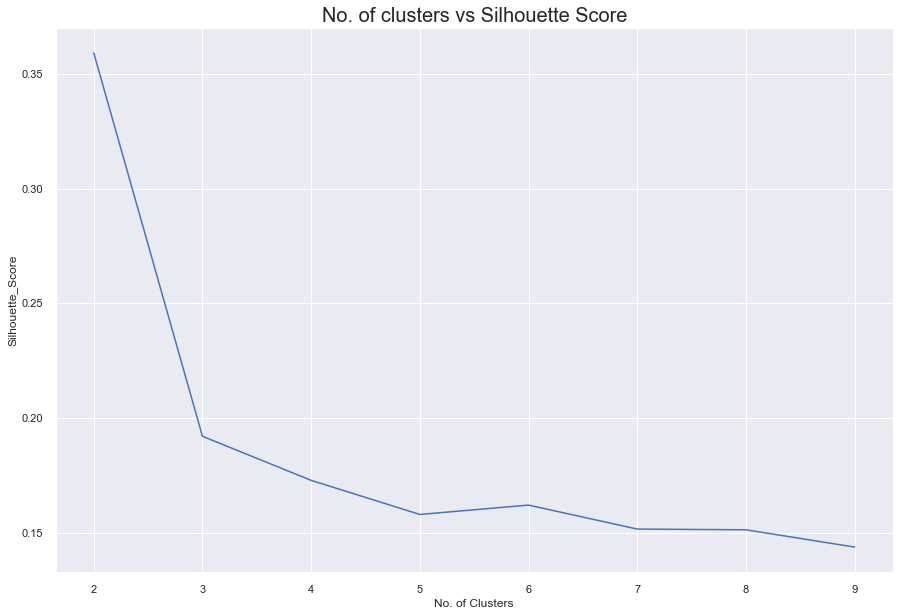

In [ ]:
#x=myData[['Science and technology', 'Religion', 'Fun with friends']]
x=newData

scaler=StandardScaler()
scaler.fit(x)
wcss = []
#x=scaler.transform(x)
for i in range(2, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10,random_state=0)
    km.fit(x)
    y_means=km.predict(x)
    s=silhouette_score(x,y_means)
    wcss.append(s)
plt.plot(range(2, 10), wcss)
plt.title('No. of clusters vs Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette_Score')
plt.show()

In [153]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000, n_init = 30,random_state=2)
x=myData2
km.fit(x)
y_means=km.predict(x)
cent = km.cluster_centers_
myData['y_means']=y_means
myData.groupby('y_means').mean()
kmeans=pd.DataFrame(y_means)

In [ ]:
myData.head()
fig = px.scatter_3d(myData, x=myData.columns[0], y=myData.columns[1], z=myData.columns[2], color=y_means, symbol=y_means, height=700)
fig.show() 

C:\Users\Nikola Petrovic\AppData\Local\Temp\ipykernel_23260\2349083183.py:8: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



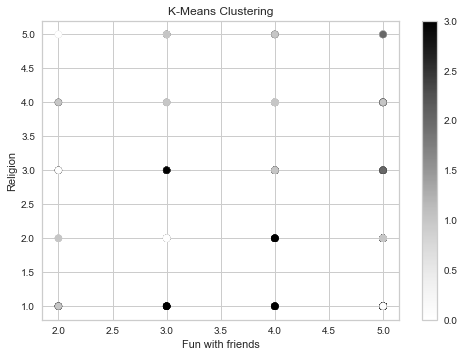

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(newData['Fun with friends'],newData['Religion'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Fun with friends')
ax.set_ylabel('Religion')
plt.colorbar(scatter)

In [ ]:
newData.head()

God  Religion   Age  Education  History  Politics  Number of friends  \
0  1.0       1.0  20.0        3.0      1.0       1.0                  3   
1  1.0       1.0  19.0        3.0      1.0       4.0                  3   
2  5.0       5.0  20.0        2.0      1.0       1.0                  3   
3  4.0       4.0  22.0        3.0      4.0       5.0                  1   
4  5.0       4.0  20.0        2.0      3.0       3.0                  3   

   Fun with friends  
0               5.0  
1               4.0  
2               5.0  
3               2.0  
4               4.0

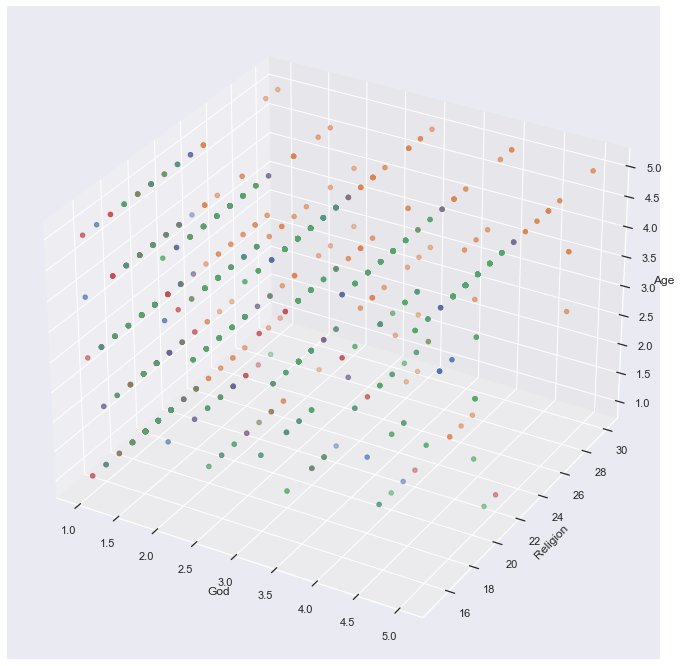

In [ ]:
printClusters(newData, y_means)# [0, 3, 6])
fig = px.scatter_3d(newData, x=newData.columns[0], y=newData.columns[2], z=newData.columns[3], color=y_means, symbol=y_means, height=700)
fig.show() 


In [ ]:
sns.pairplot(x)

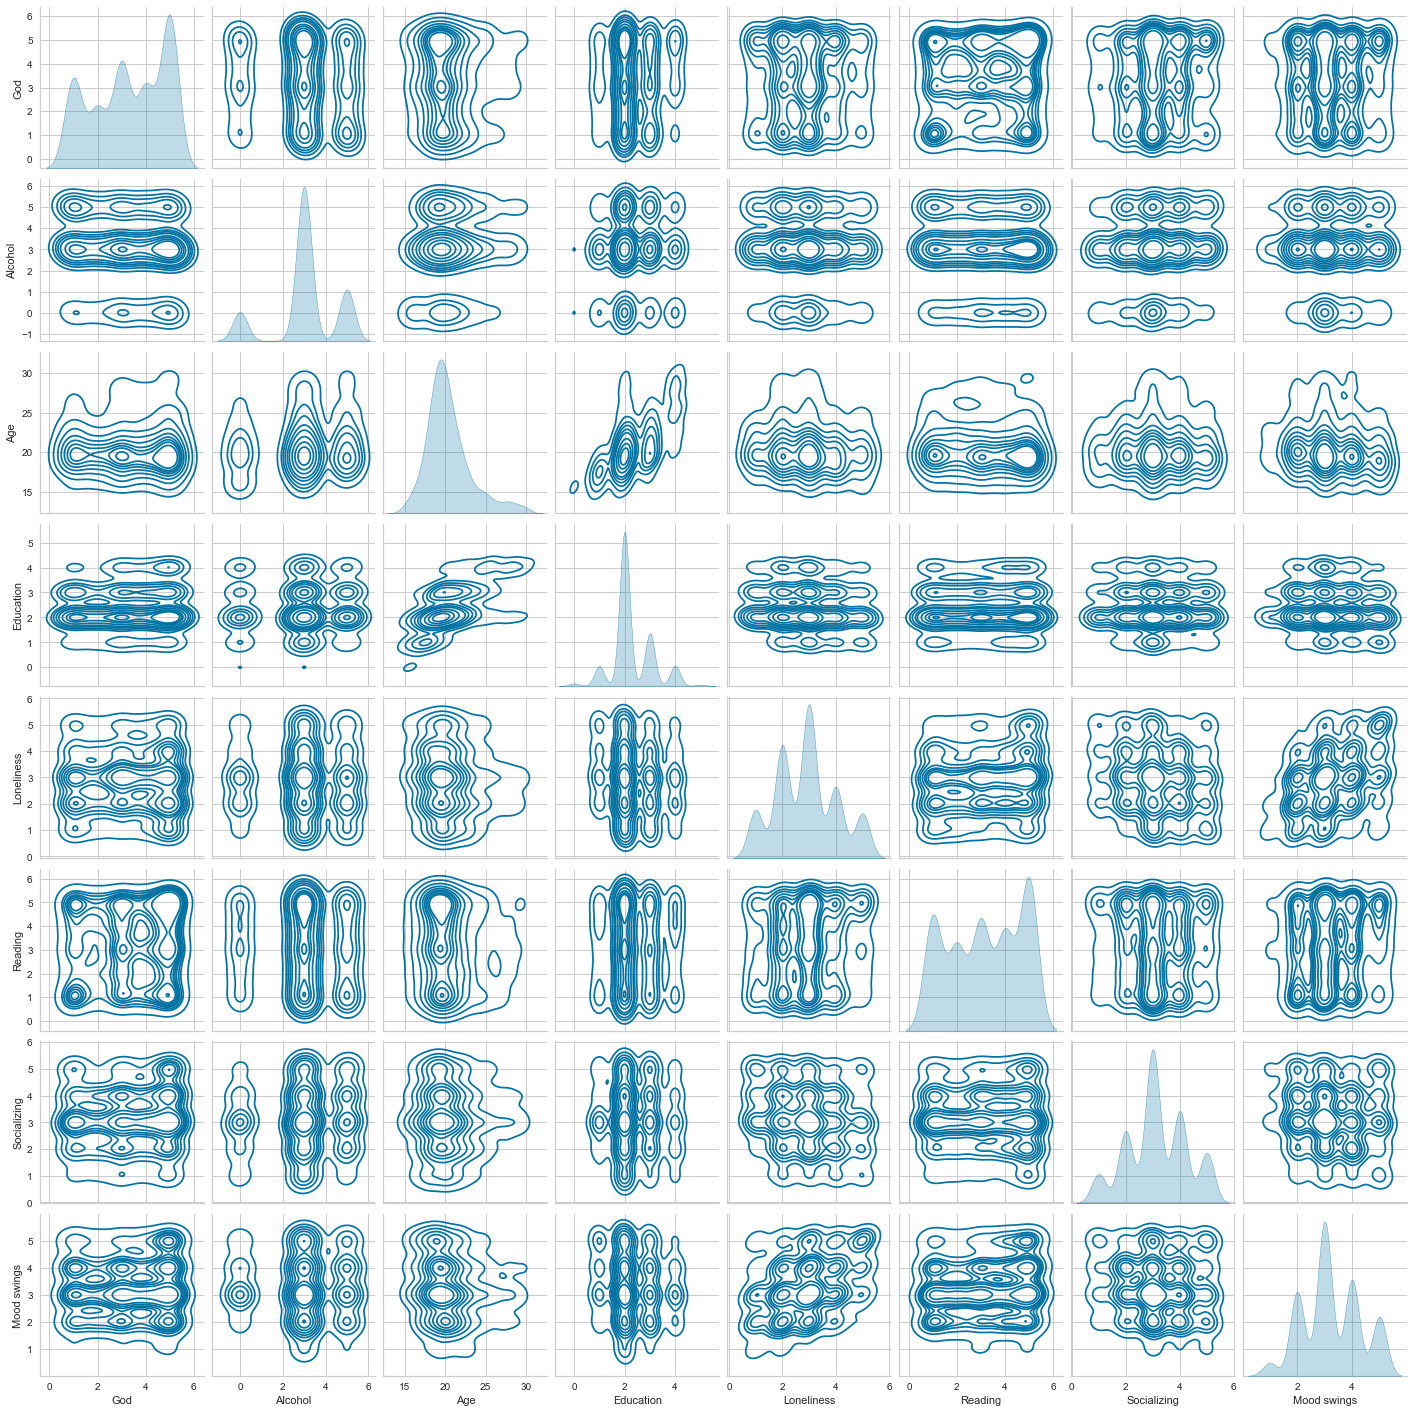

In [ ]:
sns.pairplot(newData, kind="kde")

### Aglomerative Clustering

In [91]:
from sklearn.cluster import AgglomerativeClustering

best_score = 0.0
best_ac_labels = None

for k in range(2, 8):
    ac_model = AgglomerativeClustering(n_clusters=k, compute_distances=True)
    ac_labels = ac_model.fit_predict(FinancesDF)
    
    sil_score = silhouette_score(FinancesDF, ac_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_ac_labels = ac_labels
    
    print("Clusters: ", k)
    print(ac_labels)
    print("Silhouette score: ", silhouette_score(FinancesDF, ac_labels))
    print("Davies-Bouldin score: ", davies_bouldin_score(FinancesDF, ac_labels))
    print("------------------------------------------")

Clusters:  2
[1 0 0 ... 0 0 1]
Silhouette score:  0.341598540549199
Davies-Bouldin score:  1.35607004835659
------------------------------------------
Clusters:  3
[0 1 1 ... 1 1 0]
Silhouette score:  0.41816938786496194
Davies-Bouldin score:  1.0056251713028177
------------------------------------------
Clusters:  4
[1 0 0 ... 0 0 3]
Silhouette score:  0.4762061326680857
Davies-Bouldin score:  0.8831289553012345
------------------------------------------
Clusters:  5
[1 2 2 ... 4 4 3]
Silhouette score:  0.3875835054946415
Davies-Bouldin score:  1.0656295672502007
------------------------------------------
Clusters:  6
[0 2 2 ... 4 4 1]
Silhouette score:  0.32720568493273006
Davies-Bouldin score:  1.2266186928132277
------------------------------------------
Clusters:  7
[2 0 0 ... 4 4 1]
Silhouette score:  0.29474352858529895
Davies-Bouldin score:  1.3334773625592444
------------------------------------------


### Gaussian Mixture Model

In [92]:
from sklearn import mixture


In [93]:
def GaussianMixModel(inputDF):

    best_score = 0.0
    best_gm_labels = None

    for k in range(4, 9):
        gm_model =  mixture.GaussianMixture(n_components=k, covariance_type='spherical').fit(inputDF)
        gm_labels = gm_model.fit_predict(inputDF)

        sil_score = silhouette_score(inputDF, gm_labels)
        
        if (sil_score > best_score):
            best_score = sil_score
            best_gm_labels = gm_labels
        
        print("n clusters: ", k)
        print(gm_labels)
        print("Silhouette score: ", sil_score)
        print("Davies-Bouldin score: ", davies_bouldin_score(inputDF, gm_labels))
        print("------------------------------------------")

    #printClusters(FinancesDF, best_gm_labels, [0,3,2])
    fig = px.scatter_3d(inputDF, x=inputDF.columns[0], y=inputDF.columns[3], z=inputDF.columns[2], color=best_gm_labels, symbol=best_gm_labels, height=700)
    fig.show() 

In [116]:
for DF in listOfDFs:
    print(DF.columns)
    GaussianMixModel(DF)

Index(['Thinking ahead', 'Fake', 'Lying', 'Happiness in life', 'Education',
       'Psychology', 'Village - town', 'History'],
      dtype='object')
n clusters:  4
[1 3 2 ... 3 0 1]
Silhouette score:  0.16767011555953718
Davies-Bouldin score:  1.732203007539113
------------------------------------------
n clusters:  5
[4 0 0 ... 0 3 4]
Silhouette score:  0.16073045668854222
Davies-Bouldin score:  2.1056959087722964
------------------------------------------
n clusters:  6
[0 3 3 ... 3 1 4]
Silhouette score:  0.11811442715424283
Davies-Bouldin score:  2.2076239687492234
------------------------------------------
n clusters:  7
[5 3 3 ... 3 4 2]
Silhouette score:  0.14014572521694493
Davies-Bouldin score:  1.944365183900425
------------------------------------------
n clusters:  8
[7 2 2 ... 2 5 0]
Silhouette score:  0.1269914230185779
Davies-Bouldin score:  1.9827069416937193
------------------------------------------


Index(['God', 'Religion', 'Age', 'Education', 'History', 'Politics',
       'Number of friends', 'Fun with friends'],
      dtype='object')
n clusters:  4
[0 0 3 ... 0 2 1]
Silhouette score:  0.16549756700565457
Davies-Bouldin score:  1.6135770911826652
------------------------------------------
n clusters:  5
[1 1 4 ... 1 2 1]
Silhouette score:  0.1670264229247024
Davies-Bouldin score:  1.5588032198517294
------------------------------------------
n clusters:  6
[3 3 4 ... 3 0 3]
Silhouette score:  0.15368014528220858
Davies-Bouldin score:  1.5668921055987068
------------------------------------------
n clusters:  7
[3 3 4 ... 0 6 3]
Silhouette score:  0.14030289941365623
Davies-Bouldin score:  1.5978362130209887
------------------------------------------
n clusters:  8
[7 3 2 ... 0 1 7]
Silhouette score:  0.1357039578021925
Davies-Bouldin score:  1.6614281382977953
------------------------------------------


Index(['God', 'Religion', 'Science and technology', 'Education'], dtype='object')
n clusters:  4
[3 1 2 ... 1 3 1]
Silhouette score:  0.23711955480462532
Davies-Bouldin score:  1.254279407996787
------------------------------------------
n clusters:  5
[3 0 1 ... 0 3 0]
Silhouette score:  0.2318458897763142
Davies-Bouldin score:  1.1950239435761847
------------------------------------------
n clusters:  6
[3 3 2 ... 3 3 3]
Silhouette score:  0.24592526753499874
Davies-Bouldin score:  1.1885479656249294
------------------------------------------
n clusters:  7
[2 5 4 ... 5 2 5]
Silhouette score:  0.2451337267631439
Davies-Bouldin score:  1.2168187184435666
------------------------------------------
n clusters:  8
[1 1 3 ... 1 1 1]
Silhouette score:  0.2438942872074291
Davies-Bouldin score:  1.1674891513148458
------------------------------------------


Index(['Science and technology', 'Alcohol', 'Smoking', 'Health',
       'Healthy eating', 'Active sport'],
      dtype='object')
n clusters:  4
[1 1 3 ... 3 0 0]
Silhouette score:  0.18939629418915502
Davies-Bouldin score:  1.798279928131336
------------------------------------------
n clusters:  5
[2 4 3 ... 3 1 1]
Silhouette score:  0.19872864757135228
Davies-Bouldin score:  1.6568957648186686
------------------------------------------
n clusters:  6
[3 5 2 ... 2 4 4]
Silhouette score:  0.18580333652137654
Davies-Bouldin score:  1.6110581374875486
------------------------------------------
n clusters:  7
[2 4 0 ... 0 1 1]
Silhouette score:  0.1783524484818854
Davies-Bouldin score:  1.6698347636632644
------------------------------------------
n clusters:  8
[0 6 4 ... 2 7 5]
Silhouette score:  0.1754530110525634
Davies-Bouldin score:  1.6059314599953165
------------------------------------------


Index(['Fun with friends', 'Internet', 'Physics', 'Politics',
       'Happiness in life'],
      dtype='object')
n clusters:  4
[2 0 3 ... 1 0 3]
Silhouette score:  0.19885650460001036
Davies-Bouldin score:  1.594839967005224
------------------------------------------
n clusters:  5
[2 3 1 ... 4 0 1]
Silhouette score:  0.12585384855088963
Davies-Bouldin score:  1.6445362169358966
------------------------------------------
n clusters:  6
[0 1 4 ... 2 1 4]
Silhouette score:  0.21528567716730493
Davies-Bouldin score:  1.5548947307108876
------------------------------------------
n clusters:  7
[2 3 0 ... 6 4 0]
Silhouette score:  0.17112204186648275
Davies-Bouldin score:  1.5526362811661936
------------------------------------------
n clusters:  8
[7 0 2 ... 1 5 2]
Silhouette score:  0.1817681853136592
Davies-Bouldin score:  1.4550466833719697
------------------------------------------


Index(['Finances', 'Gender', 'Children', 'Shopping', 'Shopping centres',
       'Village - town'],
      dtype='object')
n clusters:  4
[2 1 1 ... 1 1 0]
Silhouette score:  0.4762061326680857
Davies-Bouldin score:  0.8831289553012345
------------------------------------------
n clusters:  5
[3 0 0 ... 2 0 4]
Silhouette score:  0.3981534220334854
Davies-Bouldin score:  1.032121937619688
------------------------------------------
n clusters:  6
[2 5 5 ... 0 5 3]
Silhouette score:  0.3479968915202041
Davies-Bouldin score:  1.158636020957337
------------------------------------------
n clusters:  7
[3 0 6 ... 5 5 1]
Silhouette score:  0.3194765363728934
Davies-Bouldin score:  1.2073926127359076
------------------------------------------
n clusters:  8
[5 1 1 ... 6 1 3]
Silhouette score:  0.2988895983048184
Davies-Bouldin score:  1.3090127200353128
------------------------------------------


In [112]:
from sklearn import mixture

best_score = 0.0
best_gm_labels = None

for k in range(4, 9):
    gm_model =  mixture.GaussianMixture(n_components=k, covariance_type='spherical').fit(FinancesDF)
    gm_labels = gm_model.fit_predict(FinancesDF)

    sil_score = silhouette_score(FinancesDF, gm_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_gm_labels = gm_labels
    
    print("n clusters: ", k)
    print(gm_labels)
    print("Silhouette score: ", sil_score)
    print("Davies-Bouldin score: ", davies_bouldin_score(FinancesDF, gm_labels))
    print("------------------------------------------")

#printClusters(FinancesDF, best_gm_labels, [0,3,2])
fig = px.scatter_3d(FinancesDF, x=FinancesDF.columns[0], y=FinancesDF.columns[3], z=FinancesDF.columns[2], color=best_gm_labels, symbol=best_gm_labels, height=700)
fig.show() 

n clusters:  4
[1 2 2 ... 2 2 0]
Silhouette score:  0.4762061326680857
Davies-Bouldin score:  0.8831289553012345
------------------------------------------
n clusters:  5
[2 0 0 ... 0 0 4]
Silhouette score:  0.41280361694026935
Davies-Bouldin score:  1.0647444517701035
------------------------------------------
n clusters:  6
[4 2 2 ... 5 2 3]
Silhouette score:  0.3694884604472807
Davies-Bouldin score:  1.1509757131526792
------------------------------------------
n clusters:  7
[5 6 6 ... 0 6 3]
Silhouette score:  0.30423183059923015
Davies-Bouldin score:  1.437085020050213
------------------------------------------
n clusters:  8
[3 5 5 ... 7 7 2]
Silhouette score:  0.28228188997966147
Davies-Bouldin score:  1.2965424472230347
------------------------------------------


### PCA

In [113]:
from sklearn.decomposition import PCA


def printClusters3DUsingPCA(DF):
    pca = PCA(n_components=3)
    PCA_components = pca.fit_transform(DF)
    principalComponents = pd.DataFrame(PCA_components)
    principalComponents.head()

    best_score = 0.0
    best_gm_pca_labels = None

    for k in range(4, 7):
        gm_pca_model =  mixture.GaussianMixture(n_components=k, covariance_type='spherical').fit(DF)
        gm_pca_labels = gm_pca_model.fit_predict(principalComponents)

        sil_score = silhouette_score(principalComponents, gm_pca_labels)
        
        if (sil_score > best_score):
            best_score = sil_score
            best_gm_pca_labels = gm_pca_labels
            
        print("n clusters: ", k)
        print(gm_pca_labels)
        print("Silhouette score: ", sil_score)
        print("Davies-Bouldin score: ", davies_bouldin_score(principalComponents, gm_pca_labels))
        print("------------------------------------------")
        

    fig = px.scatter_3d(DF, x=DF[DF.columns[0]], y=DF[DF.columns[1]], z=DF[DF.columns[2]], color=best_gm_pca_labels, symbol=best_gm_pca_labels, height=700)
    fig.show() 

In [117]:
for DF in listOfDFs:
    print(DF.columns)
    printClusters3DUsingPCA(DF)

Index(['Thinking ahead', 'Fake', 'Lying', 'Happiness in life', 'Education',
       'Psychology', 'Village - town', 'History'],
      dtype='object')
n clusters:  4
[1 0 0 ... 0 3 1]
Silhouette score:  0.3887318127068188
Davies-Bouldin score:  0.9142763114387669
------------------------------------------
n clusters:  5
[3 0 0 ... 0 4 3]
Silhouette score:  0.33959604975026864
Davies-Bouldin score:  1.0274414704950203
------------------------------------------
n clusters:  6
[0 5 5 ... 5 1 0]
Silhouette score:  0.28149238561227297
Davies-Bouldin score:  1.1436881465871116
------------------------------------------


Index(['God', 'Religion', 'Age', 'Education', 'History', 'Politics',
       'Number of friends', 'Fun with friends'],
      dtype='object')
n clusters:  4
[1 1 0 ... 1 2 1]
Silhouette score:  0.26041116404741405
Davies-Bouldin score:  1.1659124155419756
------------------------------------------
n clusters:  5
[2 1 4 ... 1 0 2]
Silhouette score:  0.24441797246667551
Davies-Bouldin score:  1.175435599369066
------------------------------------------
n clusters:  6
[5 4 3 ... 4 2 5]
Silhouette score:  0.2410238731117592
Davies-Bouldin score:  1.1211492265332845
------------------------------------------


Index(['God', 'Religion', 'Science and technology', 'Education'], dtype='object')
n clusters:  4
[1 3 2 ... 3 1 3]
Silhouette score:  0.26952374119827394
Davies-Bouldin score:  1.1058111458567086
------------------------------------------
n clusters:  5
[1 3 2 ... 3 4 3]
Silhouette score:  0.2637477694146788
Davies-Bouldin score:  1.0294032251918463
------------------------------------------
n clusters:  6
[4 1 2 ... 1 4 1]
Silhouette score:  0.30916252275199324
Davies-Bouldin score:  0.9330119065955724
------------------------------------------


Index(['Science and technology', 'Alcohol', 'Smoking', 'Health',
       'Healthy eating', 'Active sport'],
      dtype='object')
n clusters:  4
[1 1 0 ... 0 2 3]
Silhouette score:  0.300421121523128
Davies-Bouldin score:  1.084277972105054
------------------------------------------
n clusters:  5
[4 0 3 ... 3 2 1]
Silhouette score:  0.3065498636996116
Davies-Bouldin score:  1.0799344283230354
------------------------------------------
n clusters:  6
[3 3 4 ... 0 5 1]
Silhouette score:  0.27263679072455144
Davies-Bouldin score:  1.0950109736795606
------------------------------------------


Index(['Fun with friends', 'Internet', 'Physics', 'Politics',
       'Happiness in life'],
      dtype='object')
n clusters:  4
[3 2 1 ... 2 2 1]
Silhouette score:  0.3090858391564757
Davies-Bouldin score:  1.0772872170106282
------------------------------------------
n clusters:  5
[1 3 2 ... 4 0 2]
Silhouette score:  0.19672855195372332
Davies-Bouldin score:  1.0325902810606107
------------------------------------------
n clusters:  6
[0 1 3 ... 2 1 3]
Silhouette score:  0.27868836360566285
Davies-Bouldin score:  1.0371510167479054
------------------------------------------


Index(['Finances', 'Gender', 'Children', 'Shopping', 'Shopping centres',
       'Village - town'],
      dtype='object')
n clusters:  4
[0 1 1 ... 1 1 2]
Silhouette score:  0.6549692032178333
Davies-Bouldin score:  0.5474116950052773
------------------------------------------
n clusters:  5
[2 0 4 ... 0 0 3]
Silhouette score:  0.62054071578573
Davies-Bouldin score:  0.5473803170823387
------------------------------------------
n clusters:  6
[2 5 0 ... 5 5 3]
Silhouette score:  0.6056617983121383
Davies-Bouldin score:  0.5474372549912249
------------------------------------------


In [96]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
PCA_components = pca.fit_transform(FinancesDF)
principalComponents = pd.DataFrame(PCA_components)
principalComponents.head()

best_score = 0.0
best_gm_pca_labels = None

for k in range(4, 10):
    gm_pca_model =  mixture.GaussianMixture(n_components=k, covariance_type='spherical').fit(FinancesDF)
    gm_pca_labels = gm_pca_model.fit_predict(principalComponents)

    sil_score = silhouette_score(principalComponents, gm_pca_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_gm_pca_labels = gm_pca_labels
        
    print("n clusters: ", k)
    print(gm_pca_labels)
    print("Silhouette score: ", sil_score)
    print("Davies-Bouldin score: ", davies_bouldin_score(principalComponents, gm_pca_labels))
    print("------------------------------------------")
    

fig = px.scatter_3d(FinancesDF, x=FinancesDF['Shopping'], y=FinancesDF['Finances'], z=FinancesDF['Gender'], color=best_gm_pca_labels, symbol=best_gm_pca_labels, height=700)
fig.show() 


n clusters:  4
[2 3 0 ... 3 3 1]
Silhouette score:  0.502046083695392
Davies-Bouldin score:  0.6439433881964712
------------------------------------------
n clusters:  5
[2 0 0 ... 0 0 3]
Silhouette score:  0.6299643071772956
Davies-Bouldin score:  0.5471912123674005
------------------------------------------
n clusters:  6
[2 0 4 ... 0 0 5]
Silhouette score:  0.6090069833910929
Davies-Bouldin score:  0.5211974323874101
------------------------------------------
n clusters:  7
[5 2 2 ... 2 2 6]
Silhouette score:  0.6101086273224792
Davies-Bouldin score:  0.530482869698447
------------------------------------------
n clusters:  8
[2 6 1 ... 6 6 3]
Silhouette score:  0.5931896379774715
Davies-Bouldin score:  0.5487763856899199
------------------------------------------
n clusters:  9
[6 8 1 ... 5 8 3]
Silhouette score:  0.5669723693139871
Davies-Bouldin score:  0.5614379233777949
------------------------------------------


## Hierarchical clustering

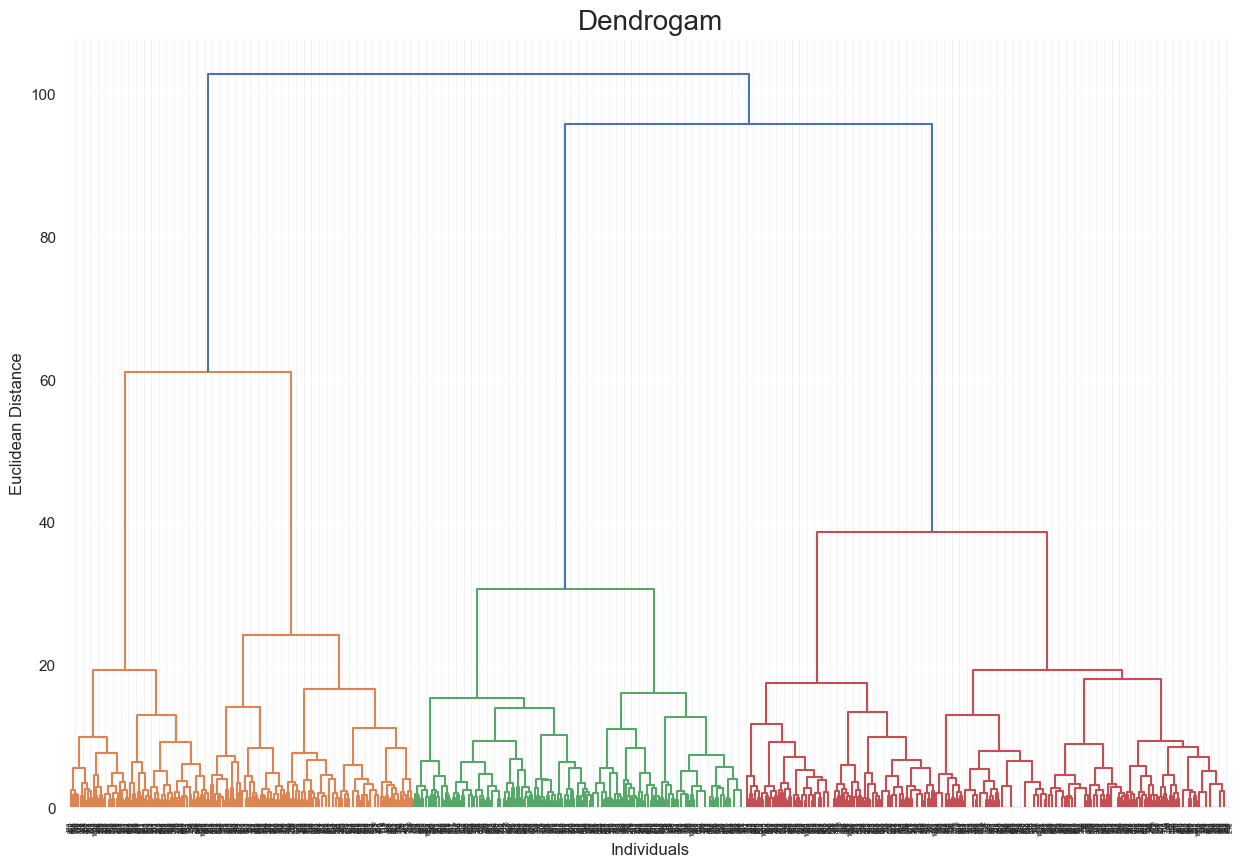

In [101]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(FinancesDF, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Individuals')
plt.ylabel('Euclidean Distance')
plt.show()

In [102]:
from sklearn.cluster import AgglomerativeClustering
#x=myData[['Science and technology','Religion','Fun with friends']]
x=FinancesDF
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean')
y_hc = hc.fit_predict(x)

In [103]:
silhouette_score(x,y_hc)

0.4762061326680857

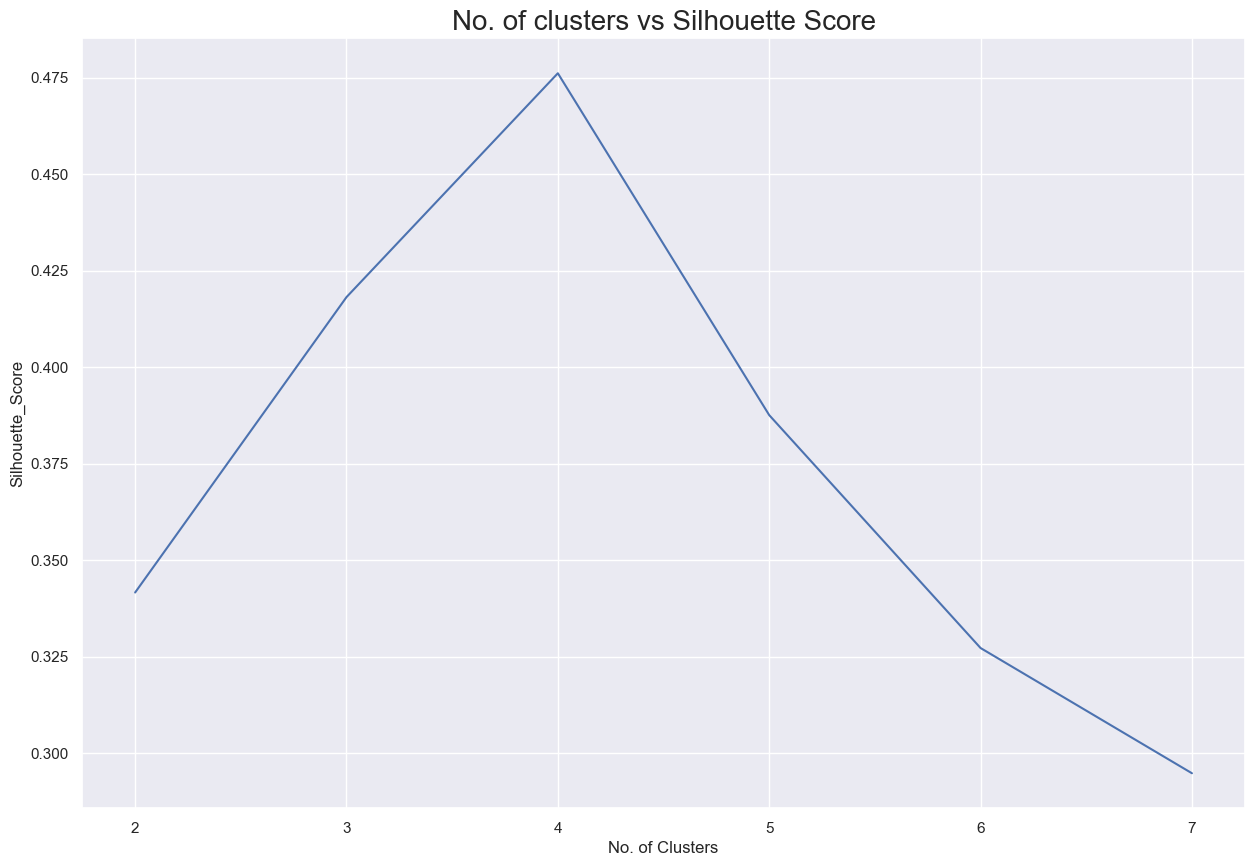

In [104]:
from sklearn.preprocessing import StandardScaler

#x=myData[['Science and technology', 'Religion', 'Fun with friends']]
x=FinancesDF

#scaler=StandardScaler()
#scaler.fit(x)
wcss = []
#x=scaler.transform(x)
for i in range(2, 8):
    hc = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean')
    y_hc = hc.fit_predict(x)
    s=silhouette_score(x,y_hc)
    wcss.append(s)
plt.plot(range(2, 8), wcss)
plt.title('No. of clusters vs Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette_Score')
plt.show()

### Evaluating Clustering Performance Using Advanced Techniques

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=5)
dbscan = DBSCAN(eps=0.3)
# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

print("Kmeans sillhouette: "+str(kmeans_silhouette))
print("Dbscan silhouette: "+str(dbscan_silhouette))

ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)
print("ARI statistika kmeans: " +str(round(ari_kmeans, 2)))
print("Ari statistika dbscan: "+str(round(ari_dbscan, 2)))# Unlike the silhouette coefficient,
# the ARI uses true cluster assignments to measure the similarity between true and predicted labels.

Kmeans sillhouette: 0.47
Dbscan silhouette: 0.38
ARI statistika kmeans: 0.3
Ari statistika dbscan: 1.0


### Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
myColumns=myData.columns
print(myColumns)

Index(['Music', 'Slow songs or fast songs', 'Movies', 'History', 'Psychology',
       'Politics', 'Mathematics', 'Science and technology', 'Reading',
       'Foreign languages', 'Religion', 'Passive sport', 'Active sport',
       'Fun with friends', 'Smoking', 'Alcohol', 'Writing notes',
       'Thinking ahead', 'Keeping promises', 'Loss of interest',
       'Friends versus money', 'Funniness', 'Fake', 'Empathy',
       'Compassion to animals', 'God', 'Number of friends', 'Lying',
       'Achievements', 'Happiness in life', 'Interests or hobbies', 'Finances',
       'Age', 'Number of siblings', 'Education', 'Village - town', 'y_means'],
      dtype='object')


In [ ]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(myColumns)
label_encoder.classes_
n_clusters = len(label_encoder.classes_)
true_labels[:5]

array([22, 31, 21, 15, 27])

In [ ]:
from sklearn.decomposition import PCA


preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42)),
        ]
    )

clusterer = Pipeline(
       [
          ("kmeans", KMeans(n_clusters=n_clusters, init="k-means++", n_init=50, max_iter=500, random_state=42,
          ),
          ),
       ]
   )
pipe = Pipeline(
     [
         ("preprocessor", preprocessor),
         ("clusterer", clusterer)
     ]
    )
pipe.fit(myData)

preprocessed_data = pipe["preprocessor"].transform(myData)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
print("silhouette score: "+str(silhouette_score(preprocessed_data, predicted_labels)))

print(predicted_labels.shape)
print(true_labels.shape)
print("adjusted rand score: "+str(adjusted_rand_score(true_labels, predicted_labels)))

## What kind of person are you?

In [ ]:
Science=input("Input your science score 1-5: ")
Religion=input("Input your religion score 1-5: ")
FWF=input("Input your fun with friends score 1-5: ")

In [ ]:
Religion=input("Input your religion score 1-5: ")

In [ ]:
FWF=input("Input your fun with friends score 1-5: ")

In [ ]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000, n_init = 30,random_state=2)
x=newData
km.fit(x)
y_means=km.predict(x)
cent = km.cluster_centers_
newData['y_means']=y_means
newData.groupby('y_means').mean()
kmeans=pd.DataFrame(y_means)

C:\Users\Nikola Petrovic\AppData\Local\Temp\ipykernel_11080\2997850816.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
newData.head()

God  Religion   Age  Education  History  Politics  Number of friends  \
0  1.0       1.0  20.0        3.0      1.0       1.0                  3   
1  1.0       1.0  19.0        3.0      1.0       4.0                  3   
2  5.0       5.0  20.0        2.0      1.0       1.0                  3   
3  4.0       4.0  22.0        3.0      4.0       5.0                  1   
4  5.0       4.0  20.0        2.0      3.0       3.0                  3   

   Fun with friends  y_means  
0               5.0        0  
1               4.0        0  
2               5.0        3  
3               2.0        3  
4               4.0        3

### Little fun never killed nobody

In [ ]:
import tkinter as tk
#Science=input("Input your science score 1-5: ")
#Religion=input("Input your religion score 1-5: ")
#FWF=input("Input your fun with friends score 1-5: ")
def function(Science, Religion, FWF):
      global pom
      test=[[Science, Religion, FWF]]
      y_means=km.predict(test)
      print("Group: "+str(y_means[0]))
      if y_means[0]==0:
            pom="You are identified to be a good person but a little confused!"
            #print("You are identified to be a good person but a little confused!")
      elif y_means[0]==1:
            pom="You are identified to be a likeable person but manipulative and not heartfelt!"
            #print("You are identified to be a likeable person but manipulative and not heartfelt!")
      elif y_means[0]==2:
            pom="You are identified to be an valuable person and student!"
            #print("You are identified to be an valuable person and student!")
      elif y_means[0]==3:
            pom="You are identified to be a atheist but smart!"
            #print("You are identified to be a atheist but smart!")
      else:
            pom="You are identified to be an outcast!"
            #print("You are identified to be an outcast!")
#function(Science, Religion, FWF)
#print(pom)
import tkinter as tk
from tkinter import messagebox
import csv

def on_submit():
    if not all(var.get() for var in vars):
        messagebox.showerror("Error", "Not all radio buttons are selected!")
    else:
        Science = science_var.get()
        Religion = religion_var.get()
        FWF = fwf_var.get()
        function(Science, Religion, FWF)
        result_label.config(text=pom)
        if first_name_entry.get() and last_name_entry.get():
            save_to_csv(first_name_entry.get(), last_name_entry.get(), Science, Religion, FWF, pom)

def save_to_csv(first_name, last_name, science, religion, fwf, result):
    with open('results.csv', mode='a') as csv_file:
        fieldnames = ['First Name', 'Last Name', 'Science', 'Religion', 'FWF', 'Result']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writerow({'First Name': first_name, 'Last Name': last_name, 'Science': science, 'Religion': religion, 'FWF': fwf, 'Result': result})

root = tk.Tk()
root.title("User Input")
root.geometry("500x500")

first_name_label = tk.Label(root, text="First Name: ")
first_name_label.grid(row=0, column=0, sticky="W", pady=10)

first_name_entry = tk.Entry(root)
first_name_entry.grid(row=0, column=1)

last_name_label = tk.Label(root, text="Last Name: ")
last_name_label.grid(row=1, column=0, sticky="W", pady=10)

last_name_entry = tk.Entry(root)
last_name_entry.grid(row=1, column=1)

science_label = tk.Label(root, text="Select Science: ")
science_label.grid(row=2, column=0, sticky="W", pady=10)

science_var = tk.IntVar()

for i in range(1, 6):
    tk.Radiobutton(root, variable=science_var, value=i).grid(row=3, column=i-1, padx=20)
root.grid_columnconfigure(2, minsize=40)

religion_label = tk.Label(root, text="Select Religion: ")
religion_label.grid(row=4, column=0, sticky="W", pady=10)

religion_var = tk.IntVar()

for i in range(1, 6):
    tk.Radiobutton(root, variable=religion_var, value=i).grid(row=5, column=i-1, padx=20)
root.grid_columnconfigure(2, minsize=40)

fwf_label = tk.Label(root, text="Select FWF: ")
fwf_label.grid(row=6, column=0, sticky="W", pady=10)

fwf_var = tk.IntVar()

for i in range(1, 6):
    tk.Radiobutton(root, variable=fwf_var, value=i).grid(row=7, column=i-1, padx=20)
root.grid_columnconfigure(2, minsize=40)

vars = [science_var, religion_var, fwf_var]

submit_button = tk.Button(root, text="Submit", bg="blue", command=on_submit)
submit_button.grid(row=8, column=2)

result_label = tk.Label(root, text="", font=("Arial", 14))
result_label.grid(row=9, column=0, columnspan=5, pady=10)
result_label.config(text="Results")
result_label.config(fg="blue", font=("Arial", 20, "bold"))
result_label.config(anchor="center")
result_label.config(width=20, height=4, wraplength=400)
root.grid_columnconfigure(0, weight=1)
root.grid_rowconfigure(9, weight=1)

close_button = tk.Button(root, text="Close", bg="red", command=root.destroy)
close_button.grid(row=10, column=2)

root.mainloop()


#Science=input("Input your science score 1-5: ")
#Religion=input("Input your religion score 1-5: ")
#FWF=input("Input your fun with friends score 1-5: ")


c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Nikola Petrovic\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Nikola Petrovic\AppData\Local\Temp\ipykernel_11080\3985404087.py", line 41, in on_submit
    function(Science, Religion, FWF)
  File "C:\Users\Nikola Petrovic\AppData\Local\Temp\ipykernel_11080\3985404087.py", line 8, in function
    y_means=km.predict(test)
  File "c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py", line 1330, in predict
    X = self._check_test_data(X)
  File "c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py", line 1007, in _check_test_data
    X = self._validate_data(
  File "c:\Users\Nikola Petrovic\anaconda3\lib\site-packages\sklearn\base.py"